# Requirements

### booking.csv

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import joblib

# Creating the dataframe

In [ ]:
df = pd.read_csv("booking.csv")
df

Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36280                         0                      2   Meal Plan 2   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   
36284                         0                      5   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
0                      0  Room_Type 1        224             Offline   
1                      0  Room_Type 1          5              Online   
2                      0  Room_Type 1          1              Online   
3                      0  Room_Type 1        211              Online   
4                      0  Room_Type 1         48              Online   
...                  ...          ...        ...                 ...   
36280                  0  Room_Type 1        346              Online   
36281                  0  Room_Type 1         34              Online   
36282                  0  Room_Type 4         83              Online   
36283                  0  Room_Type 1        121             Offline   
36284                  0  Room_Type 4         44              Online   

       repeated  P-C  P-not-C  average price  special requests  \
0             0    0        0          88.00                 0   
1             0    0        0         106.68                 1   
2             0    0        0          50.00                 0   
3             0    0        0         100.00                 1   
4             0    0        0          77.00                 0   
...         ...  ...      ...            ...               ...   
36280         0    0        0         115.00                 1   
36281         0    0        0         107.55                 1   
36282         0    0        0         105.61                 1   
36283         0    0        0          96.90                 1   
36284         0    0        0         133.44                 3   

      date of reservation booking status  
0               10/2/2015   Not_Canceled  
1               11/6/2018   Not_Canceled  
2               2/28/2018       Canceled  
3               5/20/2017       Canceled  
4               4/11/2018       Canceled  
...                   ...            ...  
36280           9/13/2018       Canceled  
36281          10/15/2017   Not_Canceled  
36282          12/26/2018   Not_Canceled  
36283            7/6/2018   Not_Canceled  
36284          10/18/2018   Not_Canceled  

[36285 rows x 17 columns]

In [ ]:
df.shape

(36285, 17)

In [ ]:
from datetime import datetime, timedelta

# Convert 'date of reservation' column to datetime object using pd.to_datetime (this handles different formats and missing values)
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Verify that the date conversion was successful
print('date of reservation: ')
print(df['date of reservation'], "\n")

# Function to calculate the arrival date using lead time
def calculate_arrival_date(reservation_date, lead_time):
    if pd.isna(reservation_date):
        return pd.NaT  # Handle missing or invalid reservation dates
    else:
        # Add the lead time to the reservation date to calculate the arrival date
        arrival_date = reservation_date + timedelta(days=lead_time)
        return arrival_date

# Apply the function to create the 'arrival_date' column
df['arrival_date'] = df.apply(lambda row: calculate_arrival_date(row['date of reservation'], row['lead time']), axis=1)

# Print the updated DataFrame to verify the new 'arrival_date' column

print(df[['date of reservation', 'lead time', 'arrival_date']], "\n")

# Print the final DataFrame
print(df[['date of reservation', 'lead time', 'arrival_date']], "\n")


date of reservation: 
0       2015-10-02
1       2018-11-06
2       2018-02-28
3       2017-05-20
4       2018-04-11
           ...    
36280   2018-09-13
36281   2017-10-15
36282   2018-12-26
36283   2018-07-06
36284   2018-10-18
Name: date of reservation, Length: 36285, dtype: datetime64[ns] 

      date of reservation  lead time arrival_date
0              2015-10-02        224   2016-05-13
1              2018-11-06          5   2018-11-11
2              2018-02-28          1   2018-03-01
3              2017-05-20        211   2017-12-17
4              2018-04-11         48   2018-05-29
...                   ...        ...          ...
36280          2018-09-13        346   2019-08-25
36281          2017-10-15         34   2017-11-18
36282          2018-12-26         83   2019-03-19
36283          2018-07-06        121   2018-11-04
36284          2018-10-18         44   2018-12-01

[36285 rows x 3 columns] 

      date of reservation  lead time arrival_date
0              2015-10-02

In [ ]:
df

Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36280                         0                      2   Meal Plan 2   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   
36284                         0                      5   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
0                      0  Room_Type 1        224             Offline   
1                      0  Room_Type 1          5              Online   
2                      0  Room_Type 1          1              Online   
3                      0  Room_Type 1        211              Online   
4                      0  Room_Type 1         48              Online   
...                  ...          ...        ...                 ...   
36280                  0  Room_Type 1        346              Online   
36281                  0  Room_Type 1         34              Online   
36282                  0  Room_Type 4         83              Online   
36283                  0  Room_Type 1        121             Offline   
36284                  0  Room_Type 4         44              Online   

       repeated  P-C  P-not-C  average price  special requests  \
0             0    0        0          88.00                 0   
1             0    0        0         106.68                 1   
2             0    0        0          50.00                 0   
3             0    0        0         100.00                 1   
4             0    0        0          77.00                 0   
...         ...  ...      ...            ...               ...   
36280         0    0        0         115.00                 1   
36281         0    0        0         107.55                 1   
36282         0    0        0         105.61                 1   
36283         0    0        0          96.90                 1   
36284         0    0        0         133.44                 3   

      date of reservation booking status arrival_date  
0              2015-10-02   Not_Canceled   2016-05-13  
1              2018-11-06   Not_Canceled   2018-11-11  
2              2018-02-28       Canceled   2018-03-01  
3              2017-05-20       Canceled   2017-12-17  
4              2018-04-11       Canceled   2018-05-29  
...                   ...            ...          ...  
36280          2018-09-13       Canceled   2019-08-25  
36281          2017-10-15   Not_Canceled   2017-11-18  
36282          2018-12-26   Not_Canceled   2019-03-19  
36283          2018-07-06   Not_Canceled   2018-11-04  
36284          2018-10-18   Not_Canceled   2018-12-01  

[36285 rows x 18 columns]

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1BflpO4JPB3hmcOg3J_GIjQ2dRJTwq2TbxQDc8hnJecs#gid=0


In [ ]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status', 'arrival_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

In [ ]:
# Drop rows where 'arrival_month' has null values
df = df.dropna(subset=['arrival_date'])

# Verify the rows have been dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36248 non-null  object        
 1   number of adults          36248 non-null  int64         
 2   number of children        36248 non-null  int64         
 3   number of weekend nights  36248 non-null  int64         
 4   number of week nights     36248 non-null  int64         
 5   type of meal              36248 non-null  object        
 6   car parking space         36248 non-null  int64         
 7   room type                 36248 non-null  object        
 8   lead time                 36248 non-null  int64         
 9   market segment type       36248 non-null  object        
 10  repeated                  36248 non-null  int64         
 11  P-C                       36248 non-null  int64         
 12  P-not-C                

In [ ]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
arrival_date                0
dtype: int64

In [ ]:
df.duplicated().sum()   # Checking for the duplicated rows

0

In [ ]:
# Print the DataFrame to verify
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special requests date of reservation booking status arrival_date  
0                 0          2015-10-02   Not_Canceled   2016-05-13  
1                 1          2018-11-06   Not_Canceled   2018-11-11  
2                 0          2018-02-28       Canceled   2018-03-01  
3                 1          2017-05-20       Canceled   2017-12-17  
4                 0          2018-04-11       Canceled   2018-05-29

In [ ]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36248.000000        36248.000000              36248.000000   
mean           1.845178            0.105302                  0.810445   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   
std            0.518671            0.402597                  0.870938   

       number of week nights  car parking space     lead time      repeated  \
count           36248.000000       36248.000000  36248.000000  36248.000000   
mean                2.204508           0.030926     85.282360      0.025546   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   
std                 1.410825           0.173119     85.961536      0.157779   

                P-C       P-not-C  average price  special requests  \
count  36248.000000  36248.000000   36248.000000      36248.000000   
mean       0.023339      0.152919     103.435350          0.620034   
min        0.000000      0.000000       0.000000          0.000000   
25%        0.000000      0.000000      80.300000          0.000000   
50%        0.000000      0.000000      99.450000          0.000000   
75%        0.000000      0.000000     120.000000          1.000000   
max       13.000000     58.000000     540.000000          5.000000   
std        0.368432      1.753126      35.081308          0.786429   

                 date of reservation                   arrival_date  
count                          36248                          36248  
mean   2018-05-24 15:28:31.410284800  2018-08-17 22:15:07.349371136  
min              2015-10-02 00:00:00            2016-05-13 00:00:00  
25%              2018-02-28 00:00:00            2018-04-06 00:00:00  
50%              2018-06-12 00:00:00            2018-08-26 00:00:00  
75%              2018-09-19 00:00:00            2018-12-25 00:00:00  
max              2018-12-31 00:00:00            2020-01-08 00:00:00  
std                              NaN                            NaN

# Exploratory Data Analysis

In [ ]:
sns.set_palette("viridis")  # Set palette for Seaborn
plt.set_cmap("viridis")  # Set colormap for Matplotlib

# sns.set_style("whitegrid")  # Apply a consistent style with the palette

<Figure size 640x480 with 0 Axes>

## Univariate Analysis

### Adults Numbers

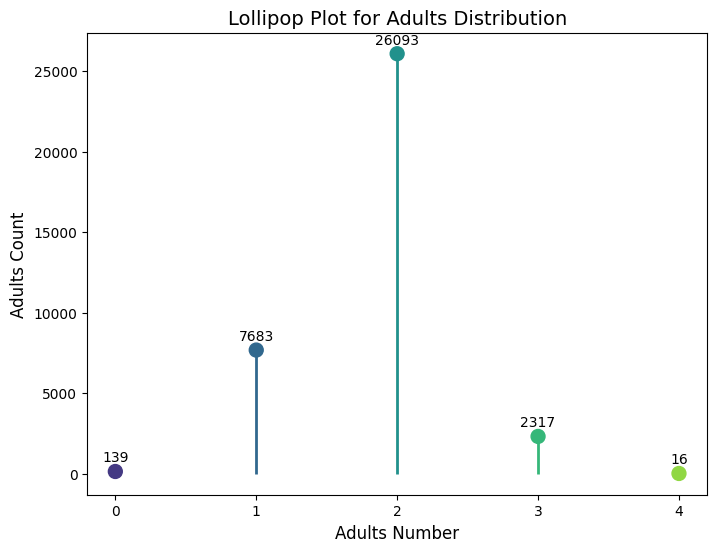

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the value counts by the number of adults (index)
adults_count = df['number of adults'].value_counts().sort_index()
Adults = adults_count.index  # Automatically sorts based on counts

# Use the 'viridis' color palette from Seaborn for the circles and lines
bar_colors = sns.color_palette("viridis", len(Adults))  # Generates colors based on the number of categories

# Create the lollipop plot
ax.vlines(x=Adults, ymin=0, ymax=adults_count, color=bar_colors, linewidth=2)
ax.scatter(Adults, adults_count, color=bar_colors, s=100, zorder=3)

# Set labels and title
ax.set_xlabel('Adults Number', fontsize=12)
ax.set_ylabel('Adults Count', fontsize=12)
ax.set_title('Lollipop Plot for Adults Distribution', fontsize=14)

# Ensure only integer ticks on x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display counts on top of circles
for i, count in enumerate(adults_count):
    plt.text(Adults[i], count + 600, str(count), ha='center', fontsize=10)

plt.show()

### Children Numbers

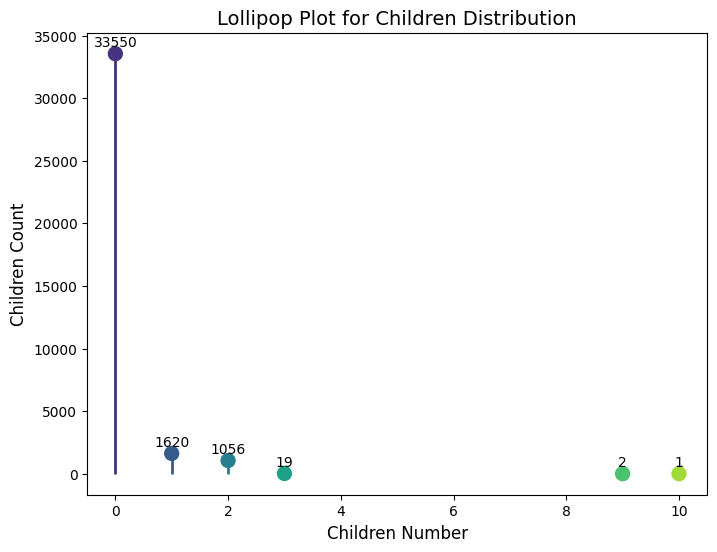

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Count occurrences of each value in 'number of children'
child_counts = df['number of children'].value_counts().sort_index()
Children = child_counts.index  # Automatically sorts based on counts

# Use the 'viridis' color palette for circles and lines
bar_colors = sns.color_palette("viridis", len(Children))

# Create the lollipop plot
ax.vlines(x=Children, ymin=0, ymax=child_counts, color=bar_colors, linewidth=2)
ax.scatter(Children, child_counts, color=bar_colors, s=100, zorder=3)

# Set labels and title
ax.set_xlabel('Children Number', fontsize=12)
ax.set_ylabel('Children Count', fontsize=12)
ax.set_title('Lollipop Plot for Children Distribution', fontsize=14)

# Ensure only integer ticks on x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display counts on top of circles
for i, count in enumerate(child_counts):
    plt.text(Children[i], count + 600, str(count), ha='center', fontsize=10)

plt.show()

### Weekend night Numbers

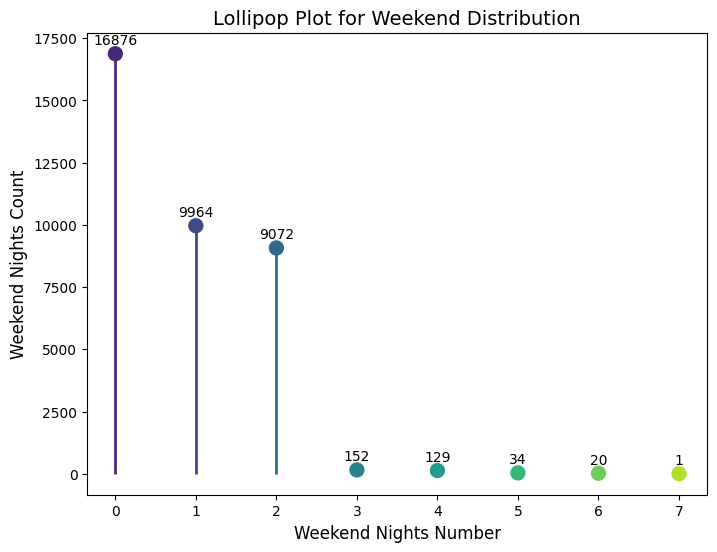

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the value counts by the number of weekend nights (index)
weekend_count = df['number of weekend nights'].value_counts().sort_index()
Weekend = weekend_count.index  # Automatically sorts based on counts

# Use the 'viridis' color palette from Seaborn for the circles and lines
bar_colors = sns.color_palette("viridis", len(Weekend))  # Generates colors based on the number of categories

# Create the lollipop plot
ax.vlines(x=Weekend, ymin=0, ymax=weekend_count, color=bar_colors, linewidth=2)
ax.scatter(Weekend, weekend_count, color=bar_colors, s=100, zorder=3)

# Set labels and title
ax.set_xlabel('Weekend Nights Number', fontsize=12)
ax.set_ylabel('Weekend Nights Count', fontsize=12)
ax.set_title('Lollipop Plot for Weekend Distribution', fontsize=14)

# Ensure only integer ticks on x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display counts on top of circles
for i, count in enumerate(weekend_count):
    plt.text(Weekend[i], count + 370, str(count), ha='center', fontsize=10)

plt.show()

### Week night Numbers

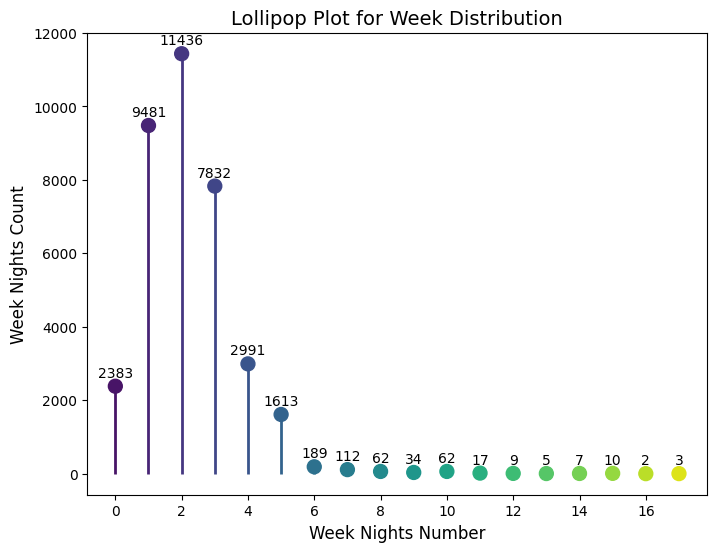

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the value counts by the number of week nights (index)
week_count = df['number of week nights'].value_counts().sort_index()
week = week_count.index  # Automatically sorts based on counts

# Use the 'viridis' color palette from Seaborn for the circles and lines
bar_colors = sns.color_palette("viridis", len(week))  # Generates colors based on the number of categories

# Create the lollipop plot
ax.vlines(x=week, ymin=0, ymax=week_count, color=bar_colors, linewidth=2)
ax.scatter(week, week_count, color=bar_colors, s=100, zorder=3)

# Set labels and title
ax.set_xlabel('Week Nights Number', fontsize=12)
ax.set_ylabel('Week Nights Count', fontsize=12)
ax.set_title('Lollipop Plot for Week Distribution', fontsize=14)

# Ensure only integer ticks on x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display counts on top of circles
for i, count in enumerate(week_count):
    plt.text(week[i], count + 250, str(count), ha='center', fontsize=10)

plt.show()

### Car parking Spaces

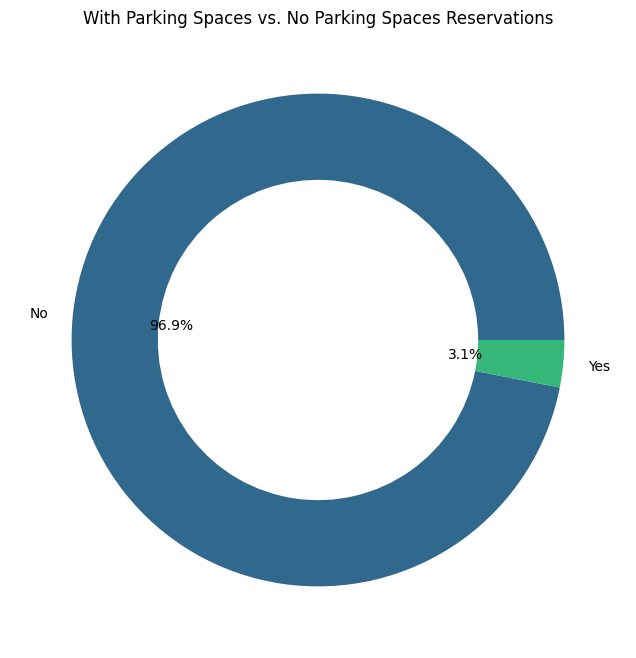

In [ ]:
# Create a new column to group datasets
df2 = df.copy()
df2['car parking space'] = df2['car parking space'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Count the occurrences
group_counts = df2['car parking space'].value_counts()

# Set a consistent color palette
colors = sns.color_palette("viridis", len(group_counts))

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.35))
plt.title('With Parking Spaces vs. No Parking Spaces Reservations')
plt.show()

### Meals Type

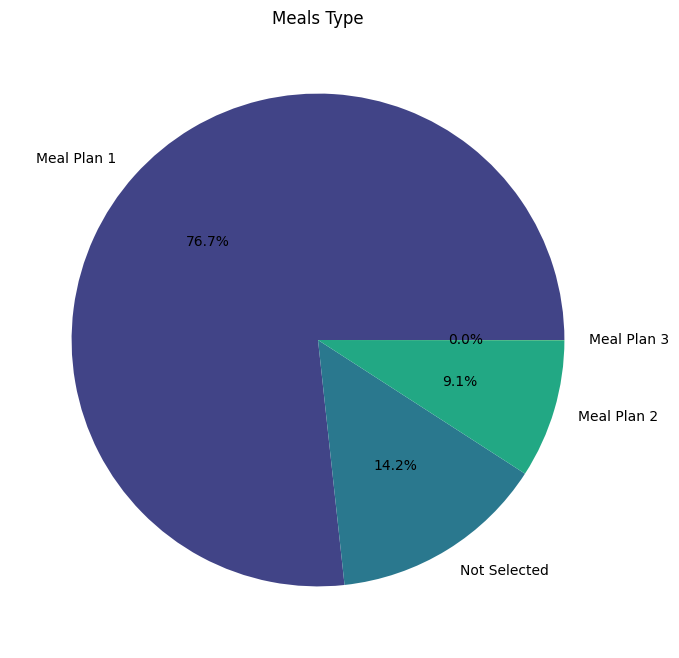

In [ ]:
# Count the occurrences
group_counts = df['type of meal'].value_counts()

# Set a consistent color palette
colors = sns.color_palette("viridis", len(group_counts))

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Meals Type')
plt.show()

### Room Type

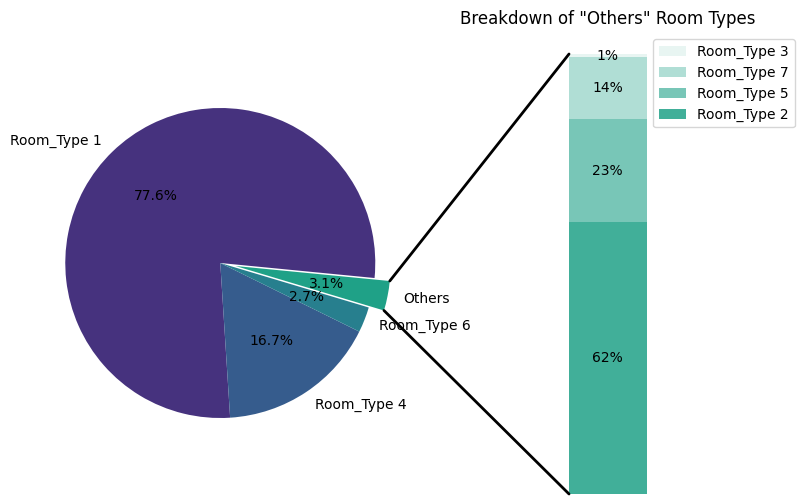

In [ ]:
from matplotlib.patches import ConnectionPatch

# Define your data
room_counts = df['room type'].value_counts()

# Group smaller categories into "Others"
threshold = 950  # Any category with less than 500 counts will go into "Others"
large_categories = room_counts[room_counts > threshold]
small_categories = room_counts[room_counts <= threshold]

# Add the "Others" category
grouped_data = large_categories.copy()
grouped_data['Others'] = small_categories.sum()

# Prepare data for the pie chart (with "Others")
overall_ratios = grouped_data / grouped_data.sum()
labels = grouped_data.index
explode = [0.1 if label == 'Others' else 0 for label in labels]

# Plot the main pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# Rotate the pie chart so that "Others" is at the top
angle = -180 * overall_ratios['Others']
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# Bar chart for detailed breakdown of "Others"
other_ratios = small_categories / small_categories.sum()
bottom = 1
width = 0.2

for i, (height, label) in enumerate(reversed([*zip(other_ratios, other_ratios.index)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C3', label=label,
                 alpha=0.1 + 0.25 * i)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# Formatting the bar chart
ax2.set_title('Breakdown of "Others" Room Types')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[-1].theta1, wedges[-1].theta2  # Focus on the "Others" slice
center, r = wedges[-1].center, wedges[-1].r
bar_height = sum(other_ratios)

# Top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData, color="black", linewidth=2)
ax2.add_artist(con)

# Bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData, color="black", linewidth=2)
ax2.add_artist(con)

plt.show()

### How they book?

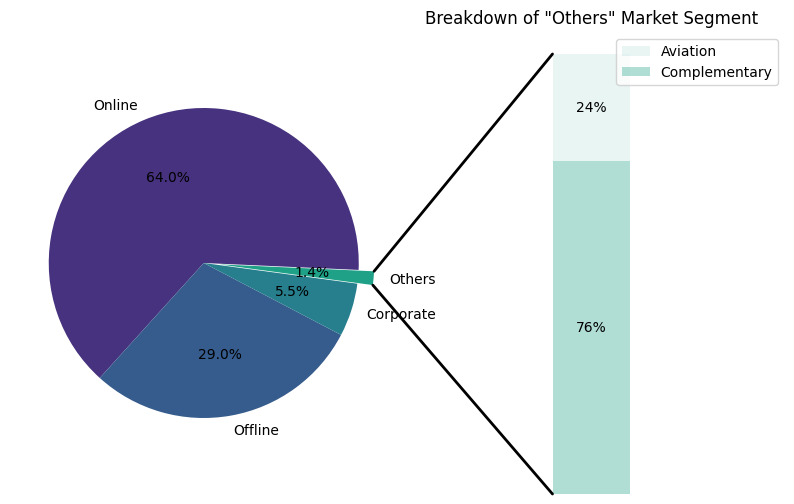

In [ ]:
# Define your data
market_segment = df['market segment type'].value_counts()

# Group smaller categories into "Others"
threshold = 400  # Any category with less than 500 counts will go into "Others"
large_categories = market_segment[market_segment > threshold]
small_categories = market_segment[market_segment <= threshold]

# Add the "Others" category
grouped_data = large_categories.copy()
grouped_data['Others'] = small_categories.sum()

# Prepare data for the pie chart (with "Others")
overall_ratios = grouped_data / grouped_data.sum()
labels = grouped_data.index
explode = [0.1 if label == 'Others' else 0 for label in labels]

# Plot the main pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# Rotate the pie chart so that "Others" is at the top
angle = -180 * overall_ratios['Others']
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# Bar chart for detailed breakdown of "Others"
other_ratios = small_categories / small_categories.sum()
bottom = 1
width = 0.2

for i, (height, label) in enumerate(reversed([*zip(other_ratios, other_ratios.index)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C3', label=label,
                 alpha=0.1 + 0.25 * i)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# Formatting the bar chart
ax2.set_title('Breakdown of "Others" Market Segment')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[-1].theta1, wedges[-1].theta2  # Focus on the "Others" slice
center, r = wedges[-1].center, wedges[-1].r
bar_height = sum(other_ratios)

# Top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData, color="black", linewidth=2)
ax2.add_artist(con)

# Bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData, color="black", linewidth=2)
ax2.add_artist(con)

plt.show()

### Distribution of Average Price

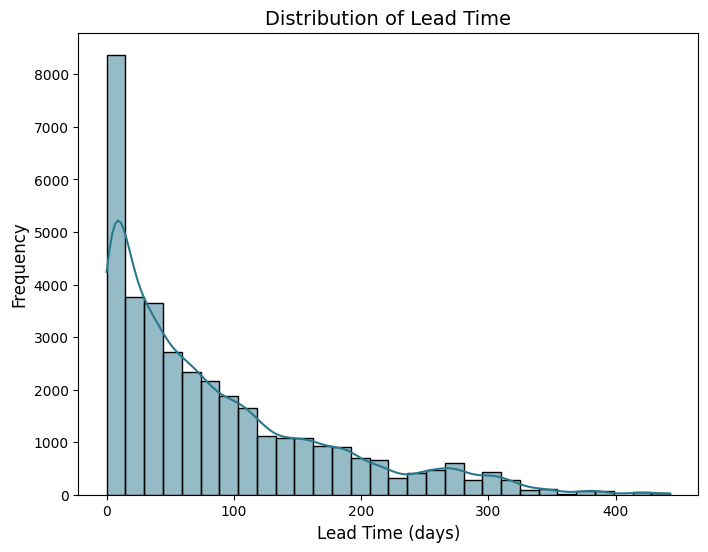

In [ ]:
# Set the color palette to 'viridis'
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='lead time', kde=True, bins=30, color=sns.color_palette("viridis", as_cmap=True)(0.4))
plt.title('Distribution of Lead Time', fontsize=14)
plt.xlabel('Lead Time (days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Distribution of Lead Time

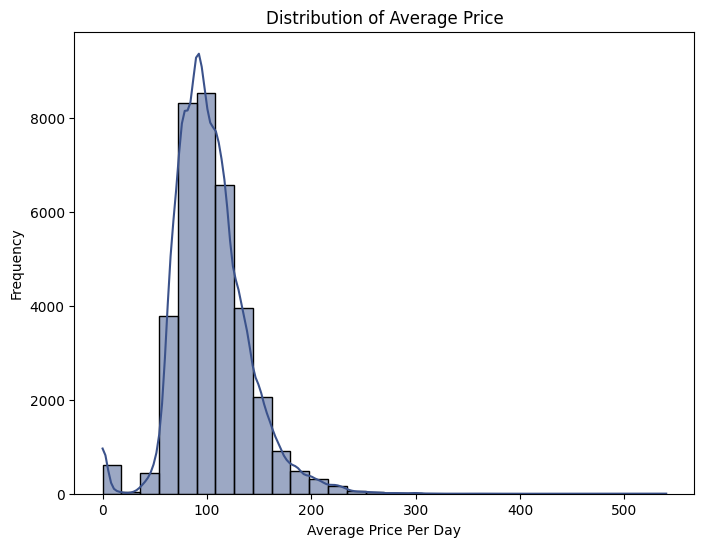

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='average price', kde=True, bins=30, color=sns.color_palette("viridis", as_cmap=True)(0.25))
plt.title('Distribution of Average Price')
plt.xlabel('Average Price Per Day')
plt.ylabel('Frequency')
plt.show()

### Number of bookings made per month

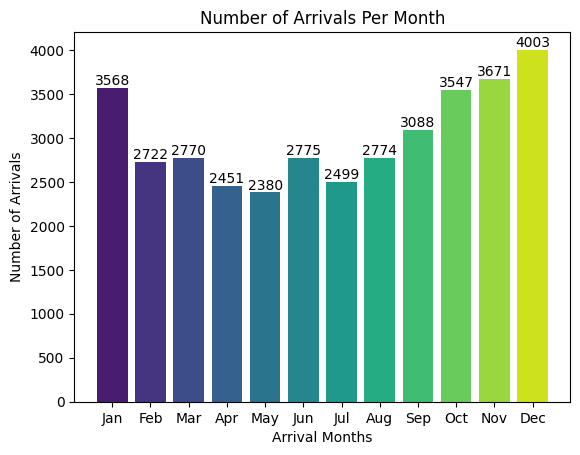

In [ ]:
# Plotting the chart
fig, ax = plt.subplots()

# Get value counts for each month and sort by month number
month_count = (df['arrival_date'].dt.month).value_counts().sort_index()

# Month numbers (1 for Jan, 2 for Feb, etc.) will be the index of month_count
months = month_count.index

# Color labels (you can modify this list if needed)
bar_colors = sns.color_palette("viridis", len(months))

# Create the bar chart
ax.bar(months, month_count, color=bar_colors)

# Set custom x-axis labels for months
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(months, month_names)  # Replace month numbers with month names

# Label the axes and set a title
ax.set_xlabel('Arrival Months')
ax.set_ylabel('Number of Arrivals')
ax.set_title('Number of Arrivals Per Month')

# Display counts on top of bars
for i, count in enumerate(month_count):
    plt.text(i + 1, count + 35, str(count), ha='center')

# Optional: Rotate labels for clarity (set rotation=0 for no rotation)
plt.xticks(rotation=0)

# Show the plot
plt.show()

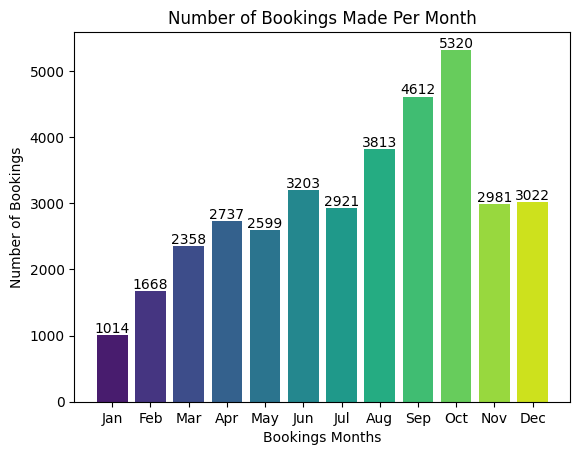

In [ ]:
# Plotting the chart
fig, ax = plt.subplots()

# Get value counts for each month and sort by month number
month_count = (df['date of reservation'].dt.month).value_counts().sort_index()

# Month numbers (1 for Jan, 2 for Feb, etc.) will be the index of month_count
months = month_count.index

# Color labels (you can modify this list if needed)
bar_colors = sns.color_palette("viridis", len(months))

# Create the bar chart
ax.bar(months, month_count, color=bar_colors)

# Set custom x-axis labels for months
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(months, month_names)  # Replace month numbers with month names

# Label the axes and set a title
ax.set_xlabel('Bookings Months')
ax.set_ylabel('Number of Bookings')
ax.set_title('Number of Bookings Made Per Month')

# Display counts on top of bars
for i, count in enumerate(month_count):
    plt.text(i + 1, count + 35, str(count), ha='center')

# Optional: Rotate labels for clarity (set rotation=0 for no rotation)
plt.xticks(rotation=0)

# Show the plot
plt.show()

### Number of bookings made per date of month

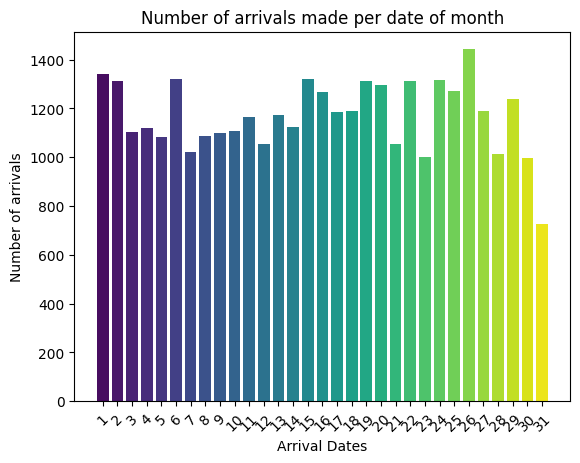

In [ ]:
fig, ax = plt.subplots()

# Sort the value counts by the number of day (index)
day_counts = (df['arrival_date'].dt.day).value_counts().sort_index()
day = day_counts.index  # This will automatically sort day based on their counts

# Color labels
bar_colors = sns.color_palette("viridis", len(day))

ax.bar(day, day_counts, color=bar_colors[:len(day)])


ax.set_xlabel('Arrival Dates')
ax.set_ylabel('Number of arrivals')
ax.set_title('Number of arrivals made per date of month')
day

# Fix the x-axis labels to range from 1 to 31
plt.xticks(ticks=day, labels=range(1, 32), rotation=45)

plt.show()

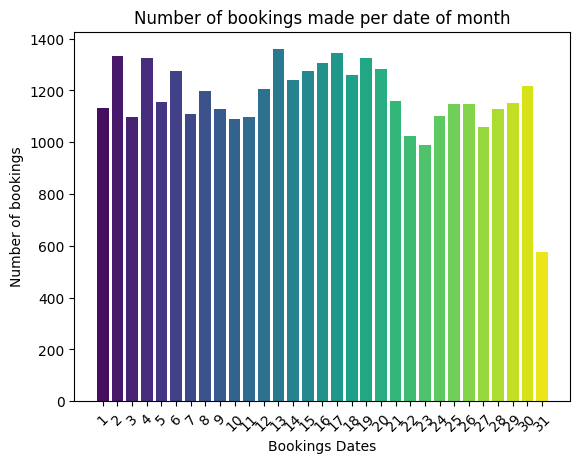

In [ ]:
fig, ax = plt.subplots()

# Sort the value counts by the number of day (index)
day_counts = (df['date of reservation'].dt.day).value_counts().sort_index()
day = day_counts.index  # This will automatically sort day based on their counts

# Color labels
bar_colors = sns.color_palette("viridis", len(day))

ax.bar(day, day_counts, color=bar_colors[:len(day)])


ax.set_xlabel('Bookings Dates')
ax.set_ylabel('Number of bookings')
ax.set_title('Number of bookings made per date of month')
day

# Fix the x-axis labels to range from 1 to 31
plt.xticks(ticks=day, labels=range(1, 32), rotation=45)

plt.show()

### Repeated Reservation

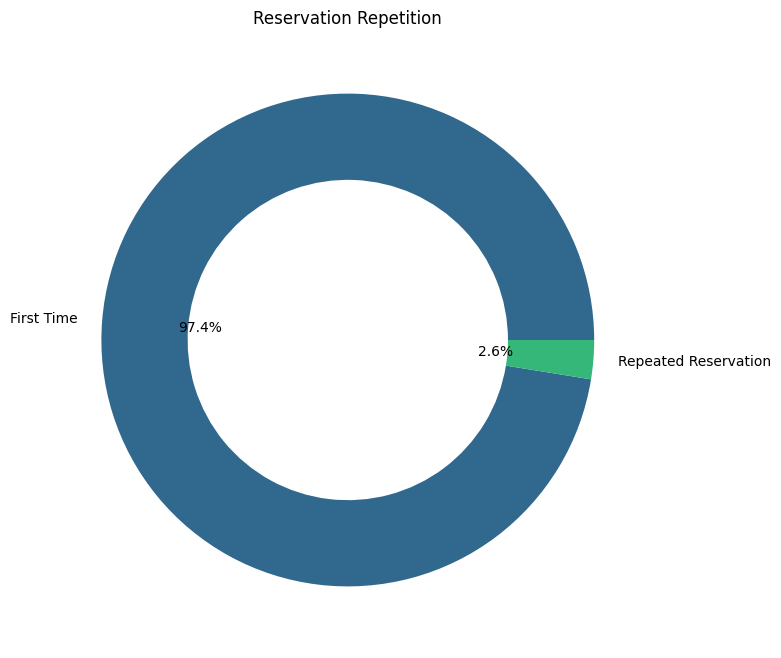

In [ ]:
# Create a new column to group datasets
df3 = df.copy()
df3['repeated'] = df3['repeated'].apply(lambda x: 'Repeated Reservation' if x == 1 else 'First Time')

# Count the occurrences
group_counts = df3['repeated'].value_counts()

# Set a consistent color palette
colors = sns.color_palette("viridis", len(group_counts))

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.35))
plt.title('Reservation Repetition')
plt.show()

### Number of special requests

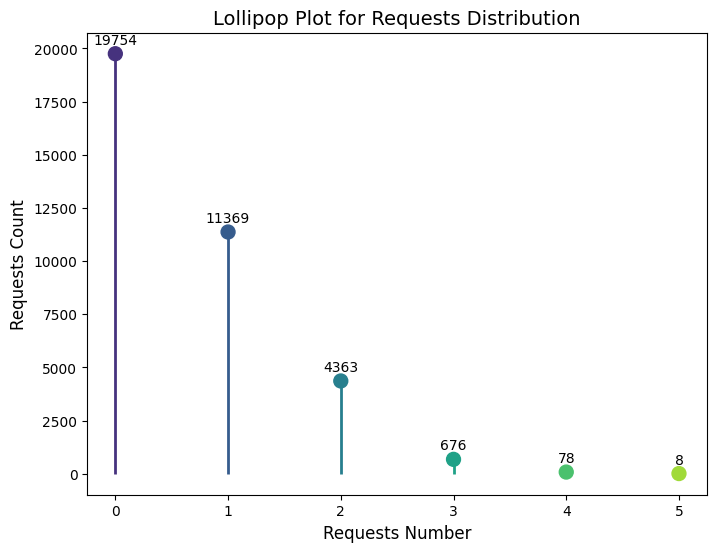

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the value counts by the number of special requests (index)
requests_count = df['special requests'].value_counts().sort_index()
requests = requests_count.index  # This will automatically sort special requests based on their counts

# Use the 'viridis' color palette from Seaborn for the circles and lines
bar_colors = sns.color_palette("viridis", len(requests))  # Generates colors based on the number of categories

# Create the lollipop plot
ax.vlines(x=requests, ymin=0, ymax=requests_count, color=bar_colors, linewidth=2)
ax.scatter(requests, requests_count, color=bar_colors, s=100, zorder=3)

# Set labels and title
ax.set_xlabel('Requests Number', fontsize=12)
ax.set_ylabel('Requests Count', fontsize=12)
ax.set_title('Lollipop Plot for Requests Distribution', fontsize=14)

# Ensure only integer ticks on x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display counts on top of circles
for i, count in enumerate(requests_count):
    plt.text(requests[i], count + 450, str(count), ha='center', fontsize=10)

plt.show()

### Booking Status

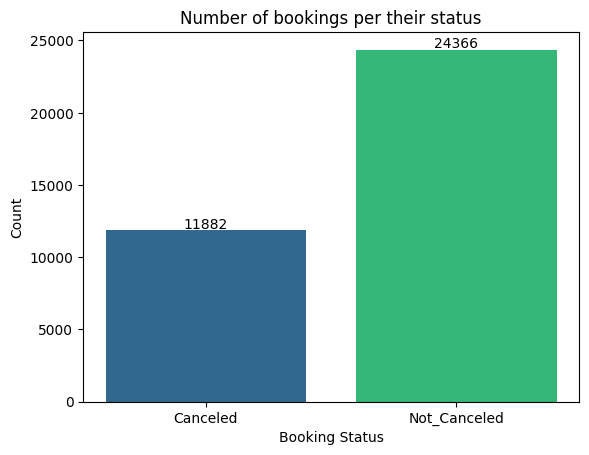

In [ ]:
fig, ax = plt.subplots()

# Sort the value counts by the number of booking status (index)
status_count = df['booking status'].value_counts().sort_index()
status = status_count.index  # This will automatically sort booking status based on their counts

# Color labels
bar_colors = sns.color_palette("viridis", len(status))

ax.bar(status, status_count, color=bar_colors)

ax.set_xlabel('Booking Status')
ax.set_ylabel('Count')
ax.set_title('Number of bookings per their status')

# Display counts on top of bars
for i, count in enumerate(status_count):
    plt.text(i, count + 100, str(count), ha='center')

plt.xticks(rotation=0)  # Rotate labels if necessary
plt.show()

# Bivariate Analysis

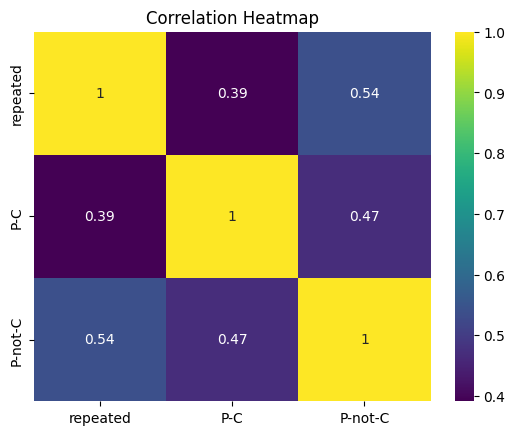

In [ ]:
# "P-C": no. of previous booking canceled
# "P-not_C": no. of previous booking not canceled

corr_matrix = df[['repeated', 'P-C', 'P-not-C']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

### Relashinship between reserved room type and Booking status

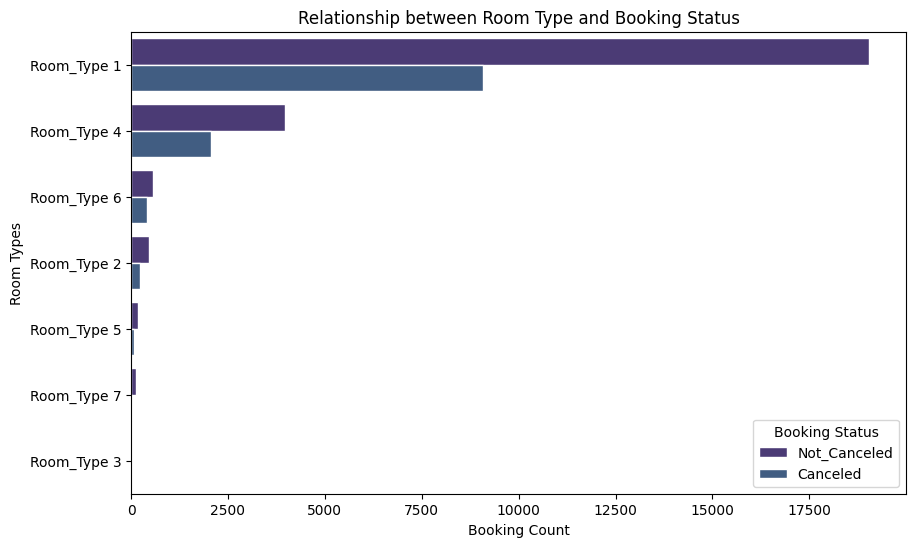

In [ ]:
# Horizontal count plot for room type and booking status
sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='room type', order=df['room type'].value_counts().index,
              hue='booking status', edgecolor="white")
plt.title('Relationship between Room Type and Booking Status')
plt.xlabel('Booking Count')
plt.ylabel('Room Types')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

### Relashinship between reserved meal type and Booking status

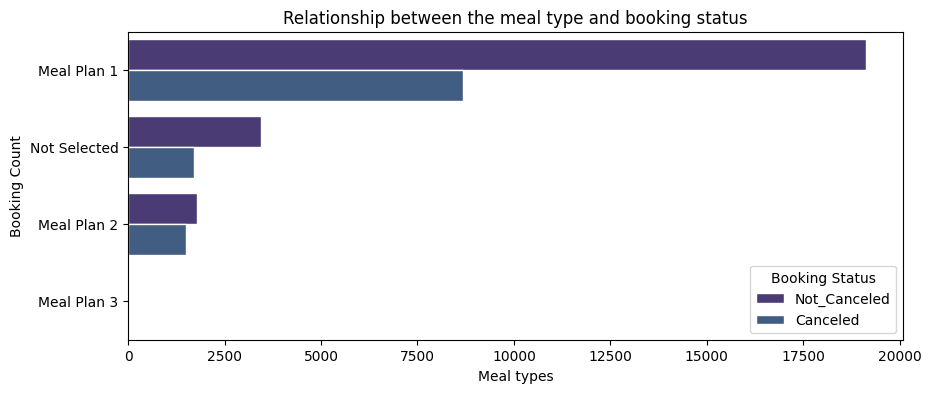

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='type of meal', order=df['type of meal'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the meal type and booking status')
plt.xlabel('Meal types')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

### Relashinship between Car Parking and Booking status

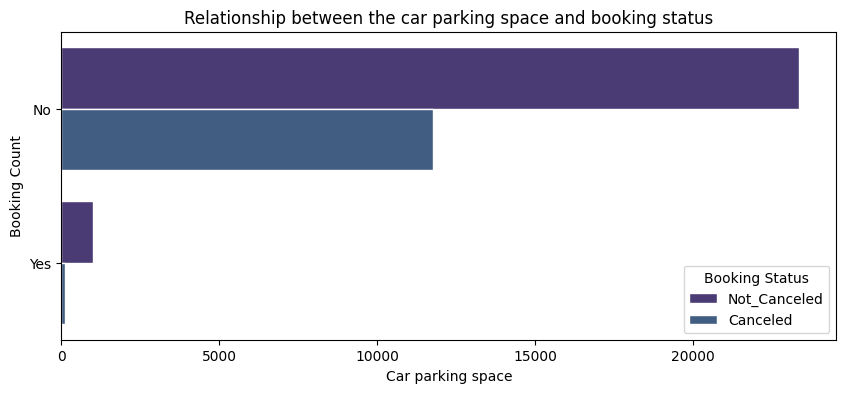

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=df2, y='car parking space', order=df2['car parking space'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the car parking space and booking status')
plt.xlabel('Car parking space')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

### Relashinship between market segment type and Booking status

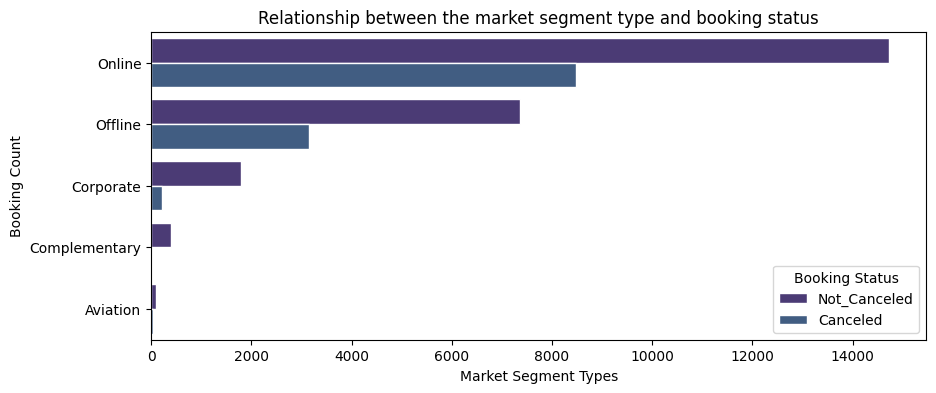

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='market segment type', order=df['market segment type'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the market segment type and booking status')
plt.xlabel('Market Segment Types')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

### Relashinship between Repeated Reservation and Booking status

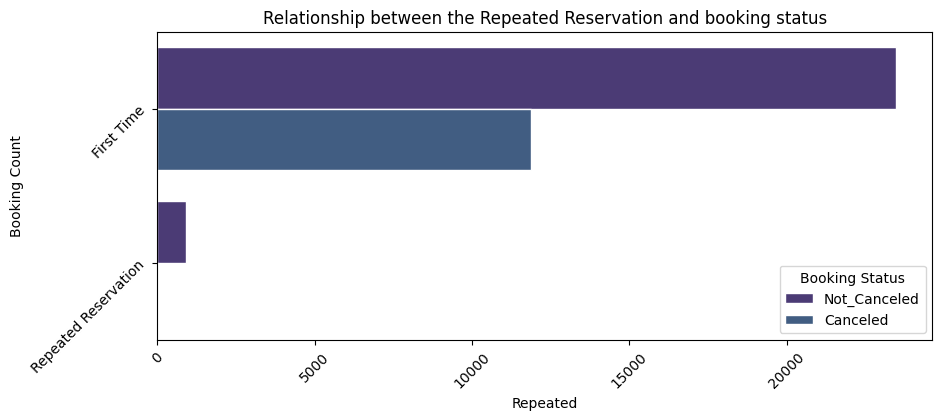

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=df3, y='repeated', order=df3['repeated'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the Repeated Reservation and booking status')
plt.xlabel('Repeated')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')

# Optional: Rotate labels for clarity (set rotation=0 for no rotation)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

### Relashinship between Special Requests and Booking status

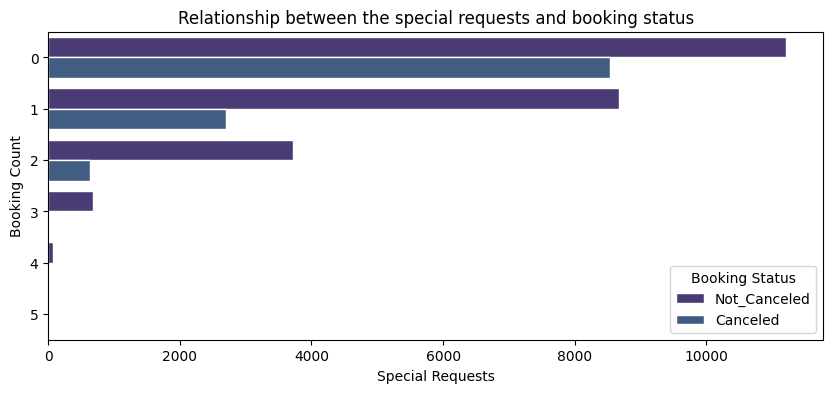

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='special requests', order=df['special requests'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the special requests and booking status')
plt.xlabel('Special Requests')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

### Relashinship between Months and Booking status

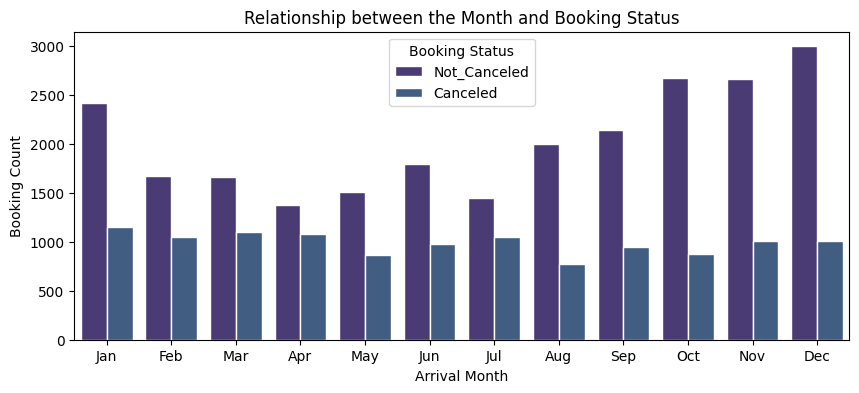

In [ ]:
sns.set_palette("viridis")

# Create the plot
plt.figure(figsize=(10, 4))

# Use 'arrival_date' with .dt.month directly in the countplot
sns.countplot(data=df, x=df['arrival_date'].dt.month, hue='booking status', edgecolor="white")

# Set custom x-axis labels for months
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=range(12), labels=month_names)  # Use correct positions and labels

plt.title('Relationship between the Month and Booking Status')
plt.xlabel('Arrival Month')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status')
plt.show()

### Relashinship between Year and Booking status

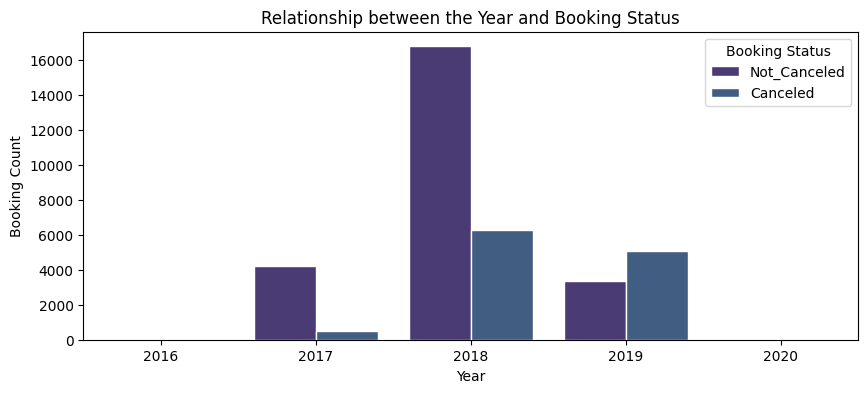

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))

# Use 'arrival_date' with .dt.year directly in the countplot
sns.countplot(data=df, x=df['arrival_date'].dt.year, hue='booking status', edgecolor="white")

plt.title('Relationship between the Year and Booking Status')
plt.xlabel('Year')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status')
plt.show()

### Relashinship between the People number and Booking status

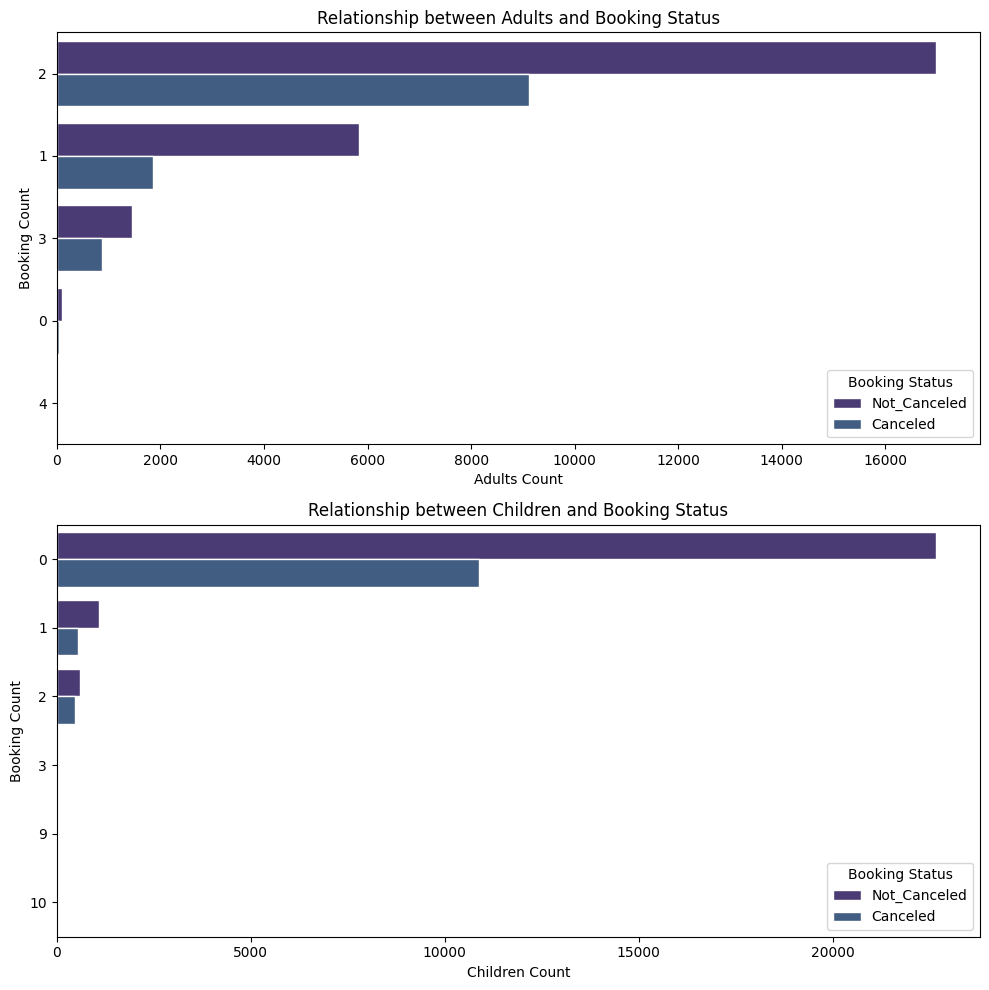

In [ ]:
sns.set_palette("viridis")

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))  # 2 row, 1 columns

# First subplot
sns.countplot(data=df, y='number of adults', order=df['number of adults'].value_counts().index,
              hue='booking status', edgecolor="white", ax=ax[0])
ax[0].set_title('Relationship between Adults and Booking Status')
ax[0].set_xlabel('Adults Count')
ax[0].set_ylabel('Booking Count')
ax[0].legend(title='Booking Status', loc='lower right')

# Second subplot
sns.countplot(data=df, y='number of children', order=df['number of children'].value_counts().index,
              hue='booking status', edgecolor="white", ax=ax[1])
ax[1].set_title('Relationship between Children and Booking Status')
ax[1].set_xlabel('Children Count')
ax[1].set_ylabel('Booking Count')
ax[1].legend(title='Booking Status', loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Relashinship between the Nights number and Booking status

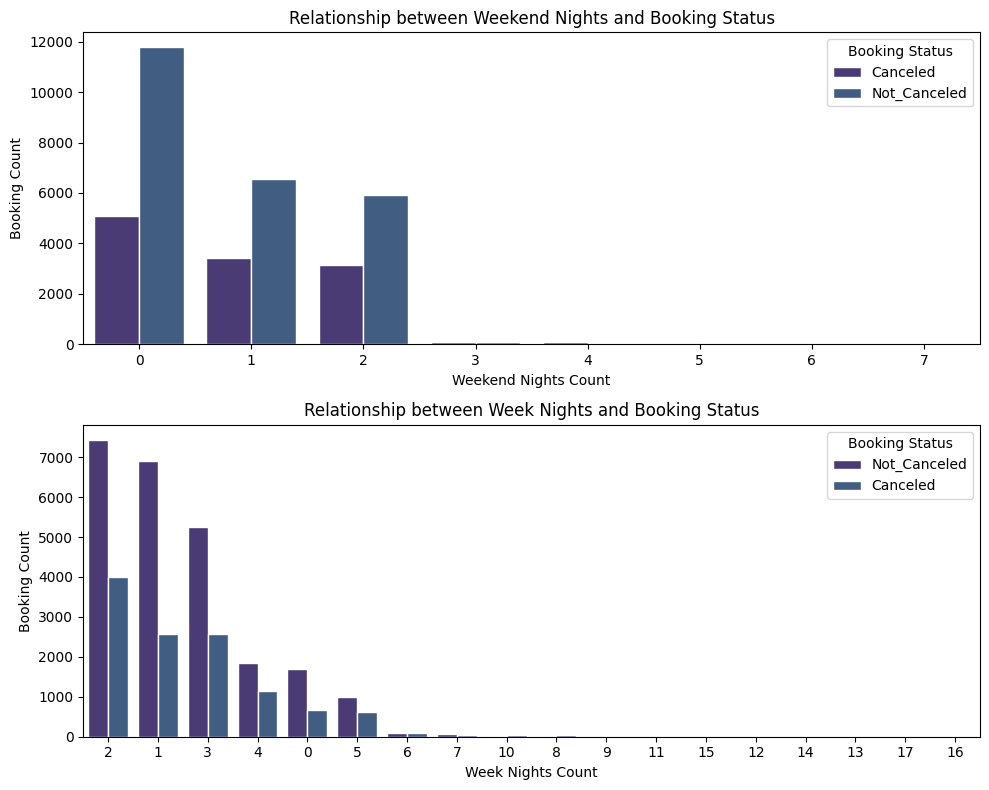

In [ ]:
sns.set_palette("viridis")

# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # 2 row, 1 columns

# First subplot
sns.countplot(data=df, x='number of weekend nights', order=df['number of weekend nights'].value_counts().index,
              hue='booking status', edgecolor="white", ax=ax[0])
ax[0].set_title('Relationship between Weekend Nights and Booking Status')
ax[0].set_xlabel('Weekend Nights Count')
ax[0].set_ylabel('Booking Count')
ax[0].legend(title='Booking Status')

# Second subplot
sns.countplot(data=df, x='number of week nights', order=df['number of week nights'].value_counts().index,
              hue='booking status', edgecolor="white", ax=ax[1])
ax[1].set_title('Relationship between Week Nights and Booking Status')
ax[1].set_xlabel('Week Nights Count')
ax[1].set_ylabel('Booking Count')
ax[1].legend(title='Booking Status')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Relationship between Lead Time and Booking Status

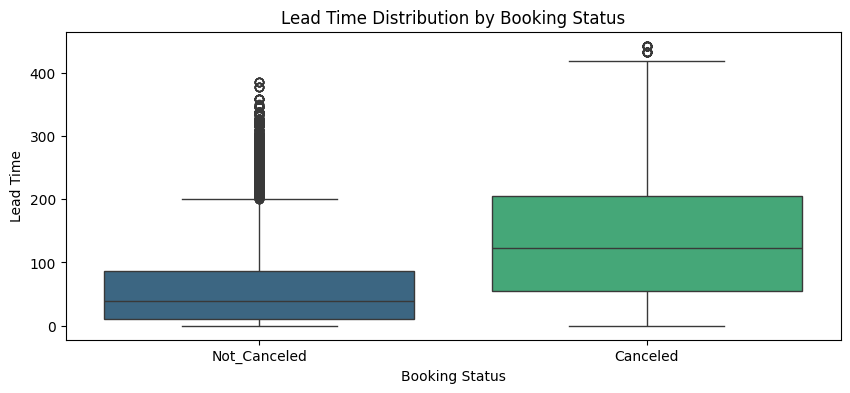

In [ ]:
colors = sns.color_palette("viridis", len(df['booking status'].unique()))

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='booking status', y='lead time', palette=colors)
plt.title('Lead Time Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()

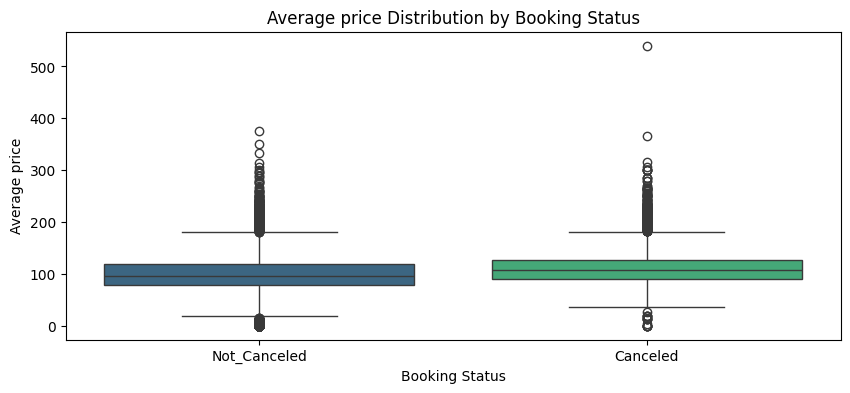

In [ ]:
colors = sns.color_palette("viridis", len(df['booking status'].unique()))

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='booking status', y='average price', palette=colors)

plt.title('Average price Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average price')
plt.show()


# Feature Engineering

In [ ]:
model_data = df.copy()
model_data = model_data.drop("Booking_ID", axis='columns')

### Total individuals & Total nights

In [ ]:
# Total individuals
model_data["total_individuals"] = model_data["number of adults"] + model_data["number of children"]

# Total nights
model_data["total_nights"] = model_data["number of week nights"] + model_data["number of weekend nights"]

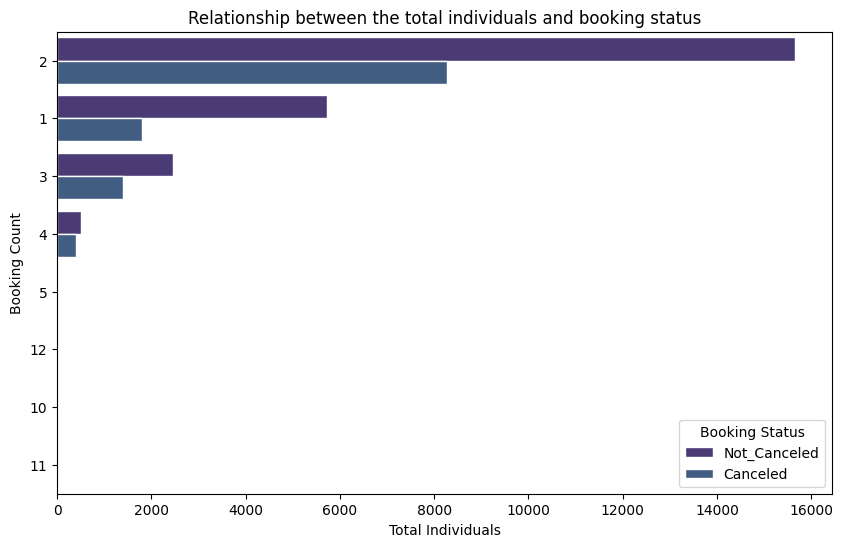

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
sns.countplot(data=model_data, y='total_individuals', order=model_data['total_individuals'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the total individuals and booking status')
plt.xlabel('Total Individuals')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status', loc='lower right')
plt.show()

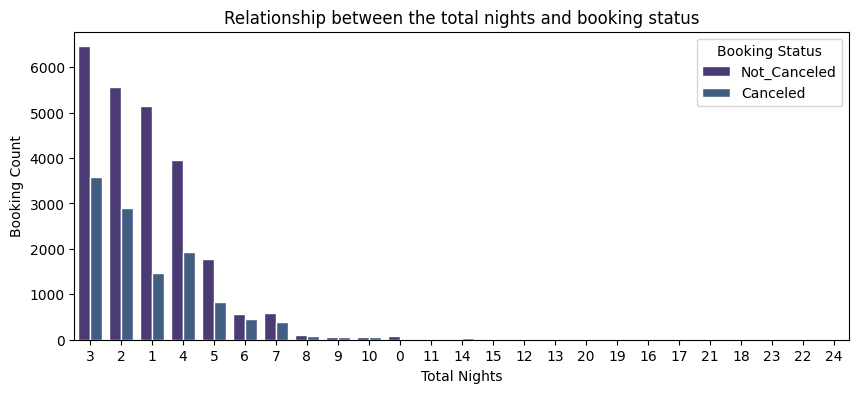

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 4))
sns.countplot(data=model_data, x='total_nights', order=model_data['total_nights'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the total nights and booking status')
plt.xlabel('Total Nights')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status')
plt.show()

### Cancel ratio by stay length

In [ ]:
df4 = df.copy()

# Number of individuals
df4["total_individuals"] = df4["number of adults"] + df4["number of children"]

# Number of total nights
df4["total_nights"] = df4["number of week nights"] + df4["number of weekend nights"]

In [ ]:
# Convert booking status to numerical
df4['booking_status_numeric'] = df4['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Calculate cancellation ratio by total nights (stay length)
ratio = df4.groupby('total_nights')['booking_status_numeric'].mean()

# Map the calculated ratio back to the original dataset
model_data['cancel_ratio_by_stay'] = df4['total_nights'].map(ratio)

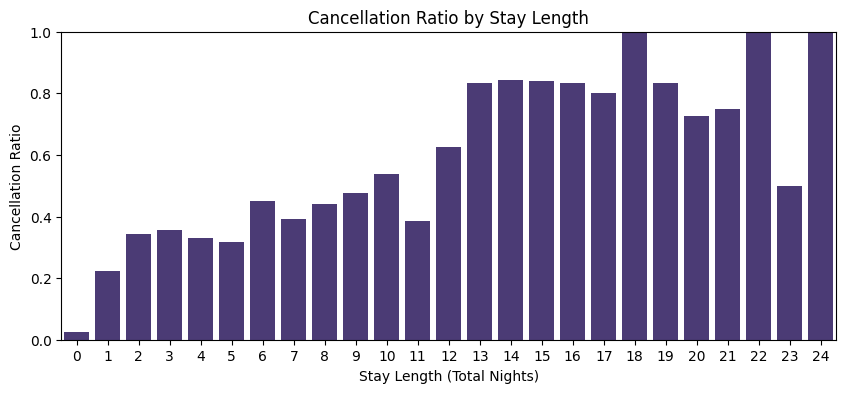

In [ ]:
# Create a bar plot for the cancellation ratio by stay length
plt.figure(figsize=(10, 4))
sns.barplot(x='total_nights', y='cancel_ratio_by_stay', data=model_data)
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1]
plt.title('Cancellation Ratio by Stay Length')
plt.xlabel('Stay Length (Total Nights)')
plt.ylabel('Cancellation Ratio')
plt.show()

### Customer Type

In [ ]:
# Define customer type based on the number of adults and children
def define_customer_type(row):
    if row['number of adults'] == 1 and row['number of children'] == 0:
        return 'solo'
    elif row['number of adults'] == 1 and row['number of children'] > 0:
        return 'family'  # Single parent with children
    elif row['number of adults'] > 1 and row['number of children'] > 0:
        return 'family'  # More than 1 adult and children
    elif row['number of adults'] > 2 and row['number of children'] == 0:
        return 'group'
    else:
        return 'couple'

model_data['customer_type'] = model_data.apply(define_customer_type, axis=1)

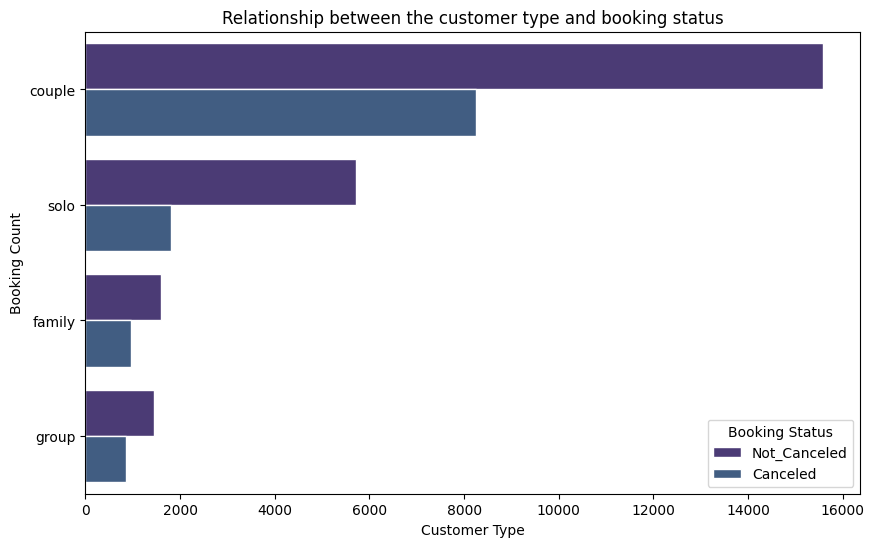

In [ ]:
sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
sns.countplot(data=model_data, y='customer_type', order=model_data['customer_type'].value_counts().index,
              hue='booking status', edgecolor = "white")
plt.title('Relationship between the customer type and booking status')
plt.xlabel('Customer Type')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status')
plt.show()

### Correlation between the features and the target

In [ ]:
model_data

number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  type of meal  car parking space    room type  \
0                          5   Meal Plan 1                  0  Room_Type 1   
1                          3  Not Selected                  0  Room_Type 1   
2                          3   Meal Plan 1                  0  Room_Type 1   
3                          2   Meal Plan 1                  0  Room_Type 1   
4                          2  Not Selected                  0  Room_Type 1   
...                      ...           ...                ...          ...   
36280                      2   Meal Plan 2                  0  Room_Type 1   
36281                      3   Meal Plan 1                  0  Room_Type 1   
36282                      3   Meal Plan 1                  0  Room_Type 4   
36283                      4   Meal Plan 1                  0  Room_Type 1   
36284                      5   Meal Plan 1                  0  Room_Type 4   

       lead time market segment type  repeated  ...  P-not-C  average price  \
0            224             Offline         0  ...        0          88.00   
1              5              Online         0  ...        0         106.68   
2              1              Online         0  ...        0          50.00   
3            211              Online         0  ...        0         100.00   
4             48              Online         0  ...        0          77.00   
...          ...                 ...       ...  ...      ...            ...   
36280        346              Online         0  ...        0         115.00   
36281         34              Online         0  ...        0         107.55   
36282         83              Online         0  ...        0         105.61   
36283        121             Offline         0  ...        0          96.90   
36284         44              Online         0  ...        0         133.44   

       special requests  date of reservation booking status arrival_date  \
0                     0           2015-10-02   Not_Canceled   2016-05-13   
1                     1           2018-11-06   Not_Canceled   2018-11-11   
2                     0           2018-02-28       Canceled   2018-03-01   
3                     1           2017-05-20       Canceled   2017-12-17   
4                     0           2018-04-11       Canceled   2018-05-29   
...                 ...                  ...            ...          ...   
36280                 1           2018-09-13       Canceled   2019-08-25   
36281                 1           2017-10-15   Not_Canceled   2017-11-18   
36282                 1           2018-12-26   Not_Canceled   2019-03-19   
36283                 1           2018-07-06   Not_Canceled   2018-11-04   
36284                 3           2018-10-18   Not_Canceled   2018-12-01   

      total_individuals  total_nights  cancel_ratio_by_stay  customer_type  
0                     2             7              0.393224         family  
1                     1             4              0.329370           solo  
2                     3             4              0.329370         family  
3                     1

In [ ]:
heat_map_df = model_data.copy()
heat_map_df = heat_map_df.select_dtypes(exclude=['datetime'])

In [ ]:
heat_map_df

number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  type of meal  car parking space    room type  \
0                          5   Meal Plan 1                  0  Room_Type 1   
1                          3  Not Selected                  0  Room_Type 1   
2                          3   Meal Plan 1                  0  Room_Type 1   
3                          2   Meal Plan 1                  0  Room_Type 1   
4                          2  Not Selected                  0  Room_Type 1   
...                      ...           ...                ...          ...   
36280                      2   Meal Plan 2                  0  Room_Type 1   
36281                      3   Meal Plan 1                  0  Room_Type 1   
36282                      3   Meal Plan 1                  0  Room_Type 4   
36283                      4   Meal Plan 1                  0  Room_Type 1   
36284                      5   Meal Plan 1                  0  Room_Type 4   

       lead time market segment type  repeated  P-C  P-not-C  average price  \
0            224             Offline         0    0        0          88.00   
1              5              Online         0    0        0         106.68   
2              1              Online         0    0        0          50.00   
3            211              Online         0    0        0         100.00   
4             48              Online         0    0        0          77.00   
...          ...                 ...       ...  ...      ...            ...   
36280        346              Online         0    0        0         115.00   
36281         34              Online         0    0        0         107.55   
36282         83              Online         0    0        0         105.61   
36283        121             Offline         0    0        0          96.90   
36284         44              Online         0    0        0         133.44   

       special requests booking status  total_individuals  total_nights  \
0                     0   Not_Canceled                  2             7   
1                     1   Not_Canceled                  1             4   
2                     0       Canceled                  3             4   
3                     1       Canceled                  1             2   
4                     0       Canceled                  1             3   
...                 ...            ...                ...           ...   
36280                 1       Canceled                  2             2   
36281                 1   Not_Canceled                  2             4   
36282                 1   Not_Canceled                  2             4   
36283                 1   Not_Canceled                  3             4   
36284                 3   Not_Canceled                  2             5   

       cancel_ratio_by_stay customer_type  
0                  0.393224        family  
1                  0.329370          solo  
2                  0.329370        family  
3                  0.342624          solo  
4                  0.357100          solo  
...                     ...           ...  
36280              0.342624        

#### Label Encoding

In [ ]:
# Training data encoding
categorical_features = ["type of meal", "room type", "market segment type", "customer_type", "booking status"]
label_encoders = {}

for col in categorical_features:
    label_encoder = LabelEncoder()
    heat_map_df[col] = label_encoder.fit_transform(heat_map_df[col])
    label_encoders[col] = label_encoder

In [ ]:
heat_map_df

number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  type of meal  car parking space  room type  \
0                          5             0                  0          0   
1                          3             3                  0          0   
2                          3             0                  0          0   
3                          2             0                  0          0   
4                          2             3                  0          0   
...                      ...           ...                ...        ...   
36280                      2             1                  0          0   
36281                      3             0                  0          0   
36282                      3             0                  0          3   
36283                      4             0                  0          0   
36284                      5             0                  0          3   

       lead time  market segment type  repeated  P-C  P-not-C  average price  \
0            224                    3         0    0        0          88.00   
1              5                    4         0    0        0         106.68   
2              1                    4         0    0        0          50.00   
3            211                    4         0    0        0         100.00   
4             48                    4         0    0        0          77.00   
...          ...                  ...       ...  ...      ...            ...   
36280        346                    4         0    0        0         115.00   
36281         34                    4         0    0        0         107.55   
36282         83                    4         0    0        0         105.61   
36283        121                    3         0    0        0          96.90   
36284         44                    4         0    0        0         133.44   

       special requests  booking status  total_individuals  total_nights  \
0                     0               1                  2             7   
1                     1               1                  1             4   
2                     0               0                  3             4   
3                     1               0                  1             2   
4                     0               0                  1             3   
...                 ...             ...                ...           ...   
36280                 1               0                  2             2   
36281                 1               1                  2             4   
36282                 1               1                  2             4   
36283                 1               1                  3             4   
36284                 3               1                  2             5   

       cancel_ratio_by_stay  customer_type  
0                  0.393224              1  
1                  0.329370              3  
2                  0.329370              1  
3                  0.342624              3  
4                  0.357100              3  
...                     ...            ...  
36280              0.342624 

### Heatmap - Numerical data

In [ ]:
# Move the target column 'booking status' to the last column
target_column = 'booking status'
columns = [col for col in heat_map_df.columns if col != target_column]  # All columns except the target
columns.append(target_column)  # Add the target column at the end

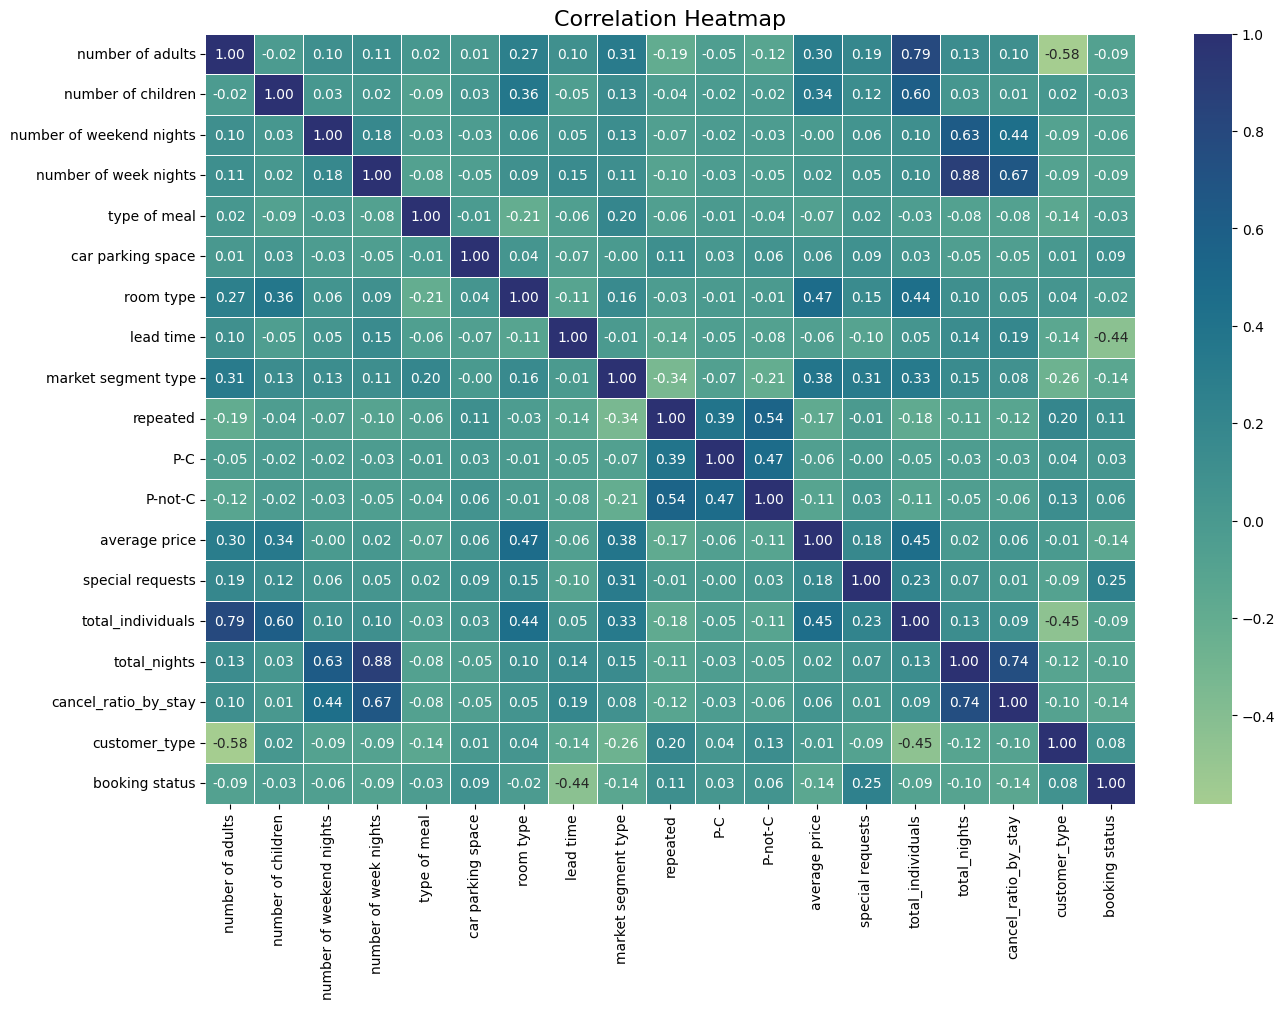

In [ ]:
# Reorder the DataFrame
heat_map_df = heat_map_df[columns]

# Calculate the correlation matrix for the remaining numeric columns
corr_matrix = heat_map_df.corr()

# Set up the figure size to make the heatmap larger
plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='crest', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
from google.colab import files

df4['arrival_month'] = df4['arrival_date'].dt.month

# Create a new DataFrame with only the necessary columns
arrival_month_data = df4[['Booking_ID', 'arrival_month']]

# Save it to a CSV file
arrival_month_data.to_csv('arrival_month_data.csv', index=False)

# Download the CSV file
files.download('arrival_month_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Extract year and month from 'arrival_date'
df4['arrival_year'] = df4['arrival_date'].dt.year

In [ ]:
# Group by year, month, and booking status
monthly_bookings = df4.groupby(['arrival_year', 'arrival_month', 'booking status']).size().unstack(fill_value=0)

# Rename columns for clarity
monthly_bookings.columns = ['Not_Canceled', 'Canceled']

In [ ]:
# Check unique values in 'booking status' column
print(df['booking status'].unique())

['Not_Canceled' 'Canceled']


In [ ]:
df4

Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36280                         0                      2   Meal Plan 2   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   
36284                         0                      5   Meal Plan 1   

       car parking space    room type  lead time market segment type  ...  \
0                      0  Room_Type 1        224             Offline  ...   
1                      0  Room_Type 1          5              Online  ...   
2                      0  Room_Type 1          1              Online  ...   
3                      0  Room_Type 1        211              Online  ...   
4                      0  Room_Type 1         48              Online  ...   
...                  ...          ...        ...                 ...  ...   
36280                  0  Room_Type 1        346              Online  ...   
36281                  0  Room_Type 1         34              Online  ...   
36282                  0  Room_Type 4         83              Online  ...   
36283                  0  Room_Type 1        121             Offline  ...   
36284                  0  Room_Type 4         44              Online  ...   

       average price  special requests  date of reservation  booking status  \
0              88.00                 0           2015-10-02    Not_Canceled   
1             106.68                 1           2018-11-06    Not_Canceled   
2              50.00                 0           2018-02-28        Canceled   
3             100.00                 1           2017-05-20        Canceled   
4              77.00                 0           2018-04-11        Canceled   
...              ...               ...                  ...             ...   
36280         115.00                 1           2018-09-13        Canceled   
36281         107.55                 1           2017-10-15    Not_Canceled   
36282         105.61                 1           2018-12-26    Not_Canceled   
36283          96.90                 1           2018-07-06    Not_Canceled   
36284         133.44                 3           2018-10-18    Not_Canceled   

       arrival_date total_individuals total_nights booking_status_numeric  \
0        2016-05-13                 2            7                      0   
1        2018-11-11                 1            4                      0   
2        2018-03-01                 3            4                      1   
3        2017-12-17                 1            2                      1   
4        2018-05-29                 1            3                      1   
...             ...               ...          ...                    ...   
36280    2019-08-25            

### Monthly Bookings (Canceled vs. Not Canceled)

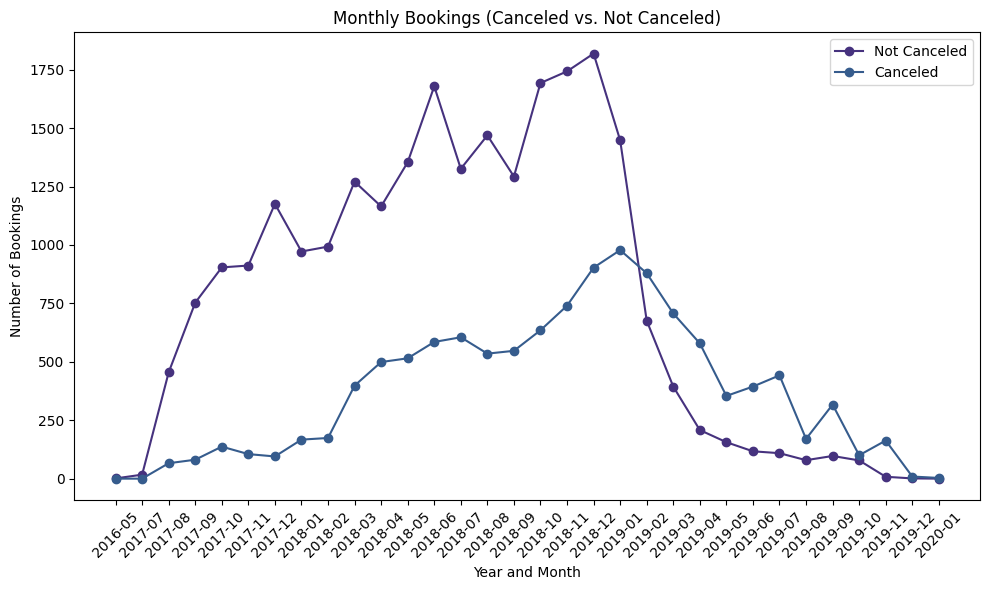

In [ ]:
# Create a new column that labels canceled and not canceled bookings
df4['booking_status_numeric'] = df4['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Group by 'arrival_year' and 'arrival_month' to get monthly counts of Canceled and Not Canceled
monthly_bookings = df4.groupby(['arrival_year', 'arrival_month'])['booking_status_numeric'].value_counts().unstack(fill_value=0)

# Rename the columns for better clarity
monthly_bookings.columns = ['Not_Canceled', 'Canceled']

# Reset the index to work with the 'arrival_year' and 'arrival_month' columns
monthly_bookings = monthly_bookings.reset_index()

# Create a new column combining 'arrival_year' and 'arrival_month' into a "YYYY-MM" string format using a loop
monthly_bookings['Year_Month'] = monthly_bookings.apply(lambda row: f"{int(row['arrival_year'])}-{int(row['arrival_month']):02d}", axis=1)

# Now, plot the data using the 'Year_Month' column as the x-axis
plt.figure(figsize=(10, 6))

# Plot 'Not Canceled' and 'Canceled' data
plt.plot(monthly_bookings['Year_Month'], monthly_bookings['Not_Canceled'], label='Not Canceled', marker='o')
plt.plot(monthly_bookings['Year_Month'], monthly_bookings['Canceled'], label='Canceled', marker='o')

# Formatting the chart
plt.title('Monthly Bookings (Canceled vs. Not Canceled)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Relation between all feature, Booking status, and price

### Relation between market segment type and Booking status

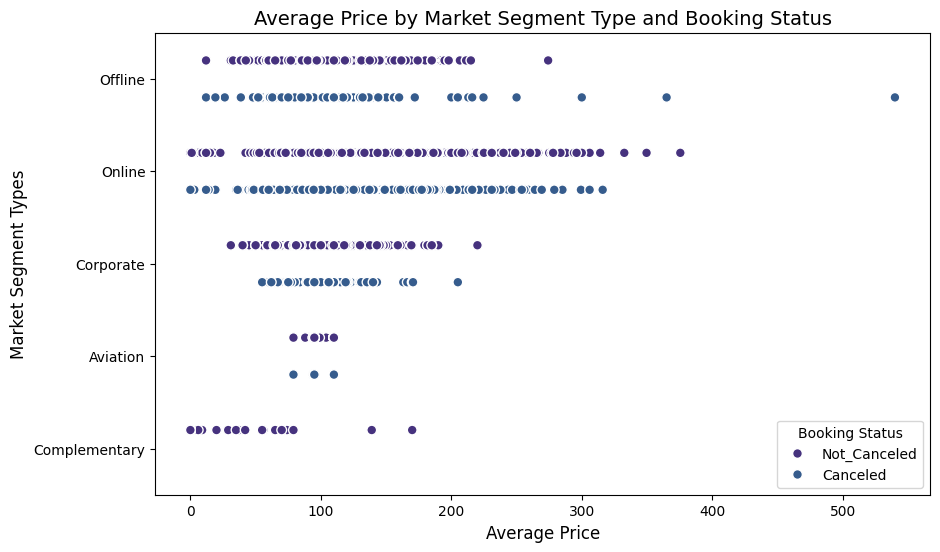

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'market segment type' on the y-axis, 'average price' on the x-axis
sns.stripplot(data=df, x='average price', y='market segment type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Average Price by Market Segment Type and Booking Status', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Market Segment Types', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation between Room type, Booking status, and price

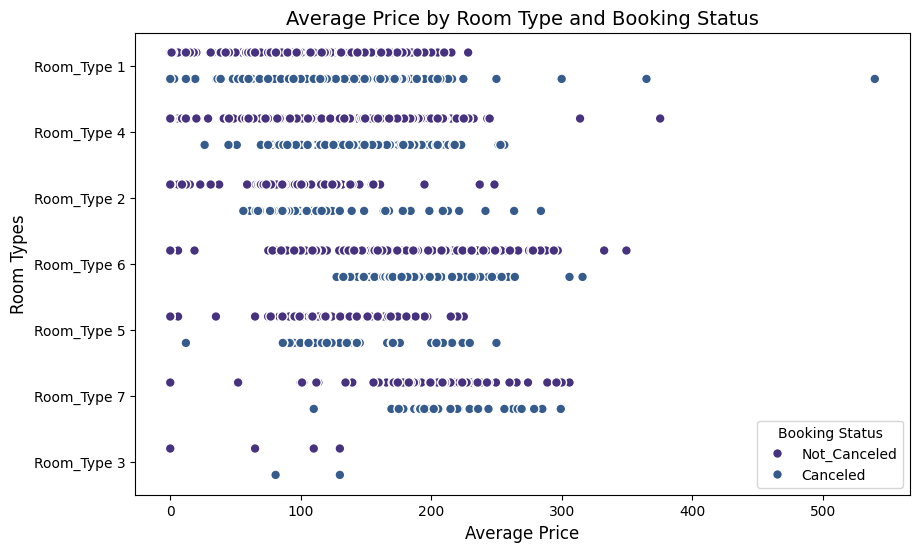

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'room type' on the y-axis, 'average price' on the x-axis
sns.stripplot(data=df, x='average price', y='room type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Average Price by Room Type and Booking Status', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Room Types', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation between Meal Plan, Booking status, and price

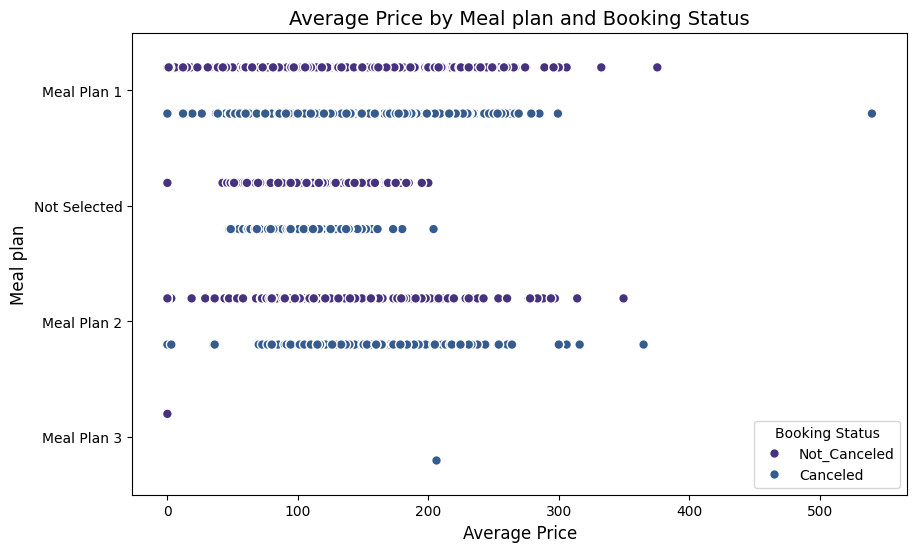

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'type of meal' on the y-axis, 'average price' on the x-axis
sns.stripplot(data=df, x='average price', y='type of meal', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Average Price by Meal plan and Booking Status', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Meal plan', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation between Customer Type, Booking status, and price

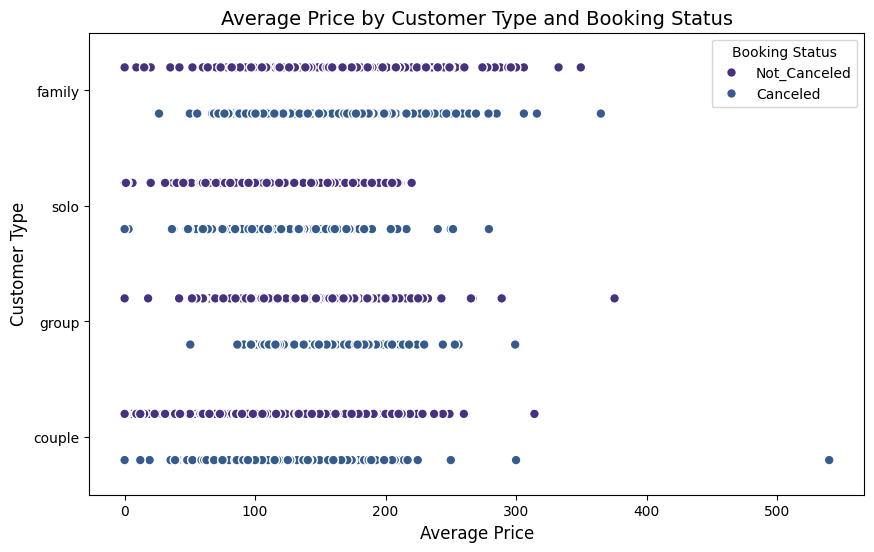

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'customer_type' on the y-axis, 'average price' on the x-axis
sns.stripplot(data=model_data, x='average price', y='customer_type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Average Price by Customer Type and Booking Status', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Customer Type', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Relation between Arrival month, Booking status, and price

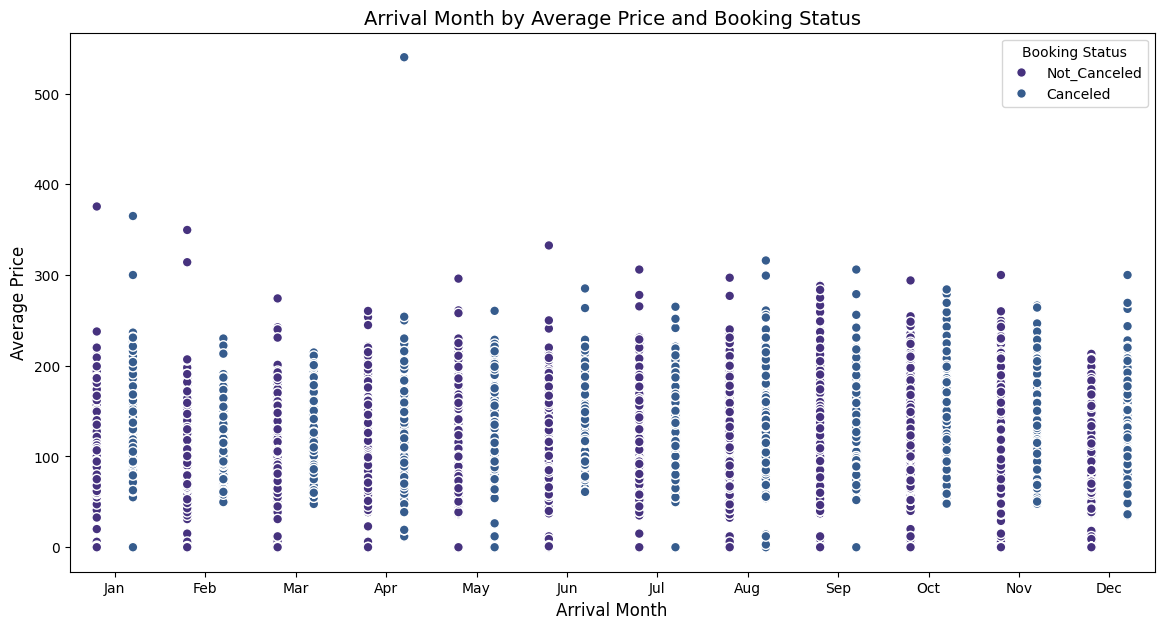

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(14, 7))

# Create the strip plot with 'Arrival month' on the x-axis, 'average price' on the y-axis
sns.stripplot(data=df, x=df['arrival_date'].dt.month, y='average price', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Arrival Month by Average Price and Booking Status', fontsize=14)
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1, 1))

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=range(12), labels=month_names)  # Use correct positions and labels

# Show the plot
plt.show()

### Relation between Arrival year, Booking status, and price

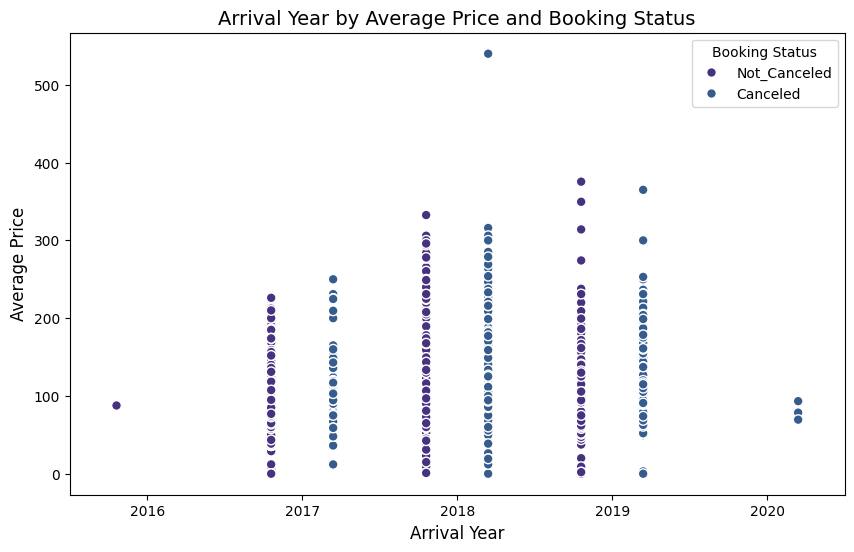

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'Arrival year' on the x-axis, 'average price' on the y-axis
sns.stripplot(data=df, x=df['arrival_date'].dt.year, y='average price', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Add titles and labels
plt.title('Arrival Year by Average Price and Booking Status', fontsize=14)
plt.xlabel('Arrival Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Relation between all feature, Booking status, and lead time

### Relation beween Customer Type, Booking status, and lead time

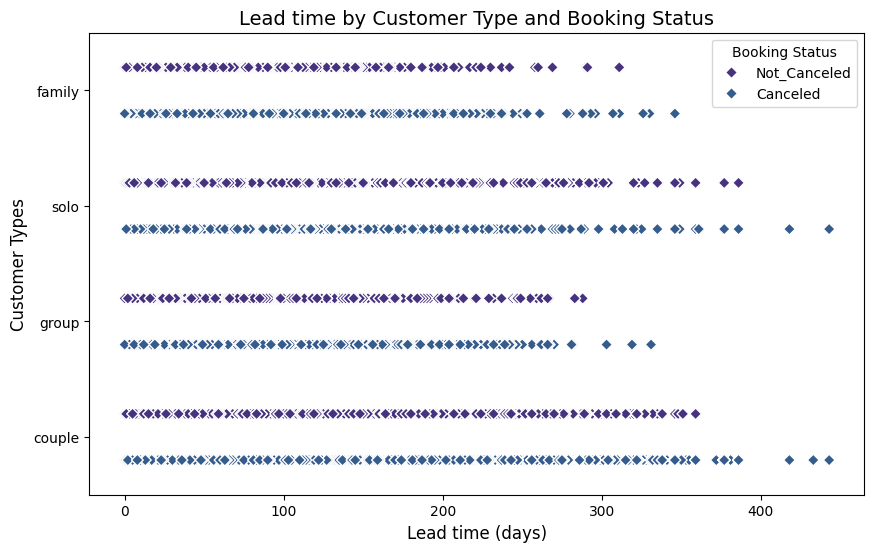

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'customer  type' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=model_data, x='lead time', y='customer_type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Customer Type and Booking Status', fontsize=14)
plt.xlabel('Lead time (days)', fontsize=12)
plt.ylabel('Customer Types', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Relation beween Room type, Booking status, and lead time

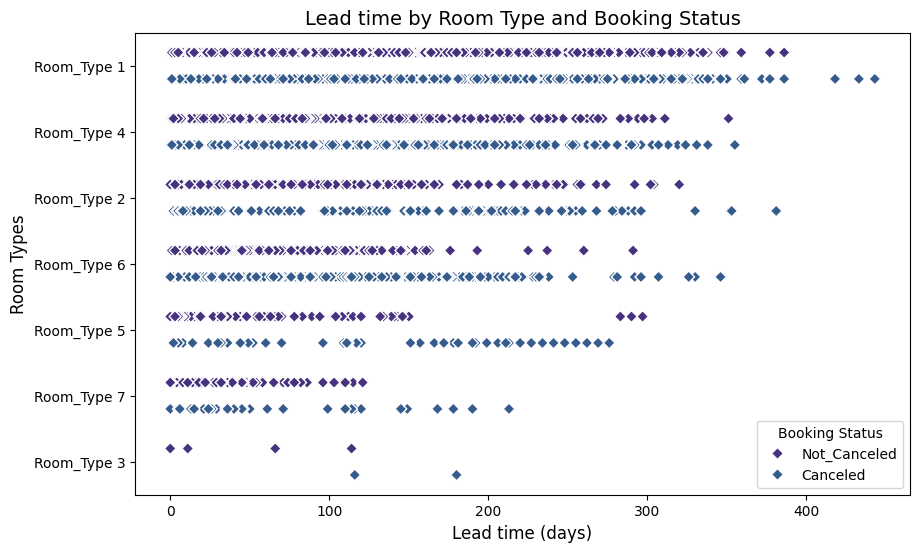

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'room type' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=df, x='lead time', y='room type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Room Type and Booking Status', fontsize=14)
plt.xlabel('Lead time (days)', fontsize=12)
plt.ylabel('Room Types', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation beween Meal Types, Booking status, and lead time

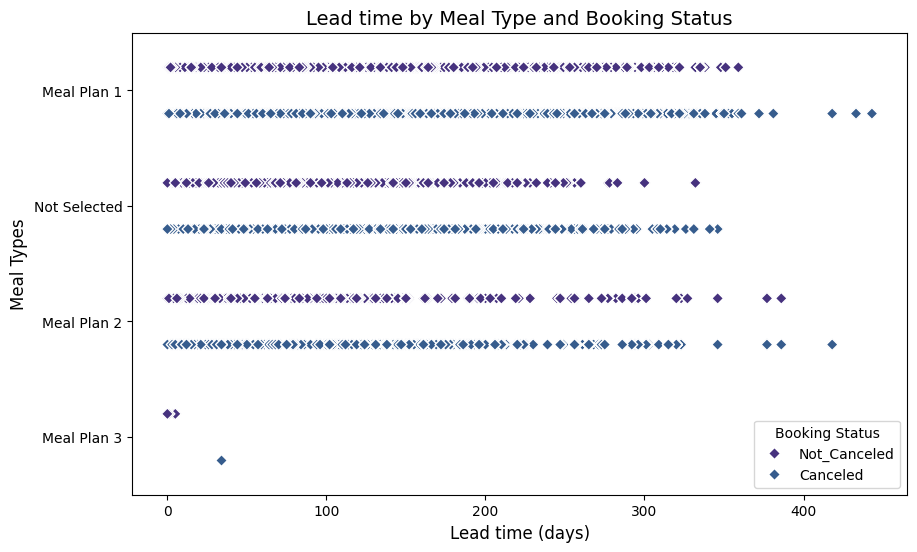

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'type of meal' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=df, x='lead time', y='type of meal', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Meal Type and Booking Status', fontsize=14)
plt.xlabel('Lead time (days)', fontsize=12)
plt.ylabel('Meal Types', fontsize=12)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation beween Market Segment Type, Booking status, and lead time

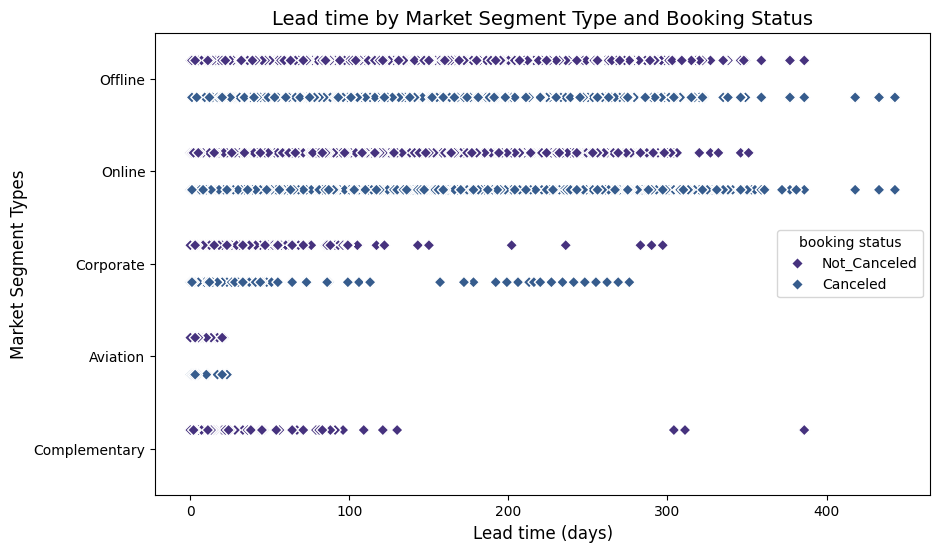

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'market segment type' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=df, x='lead time', y='market segment type', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Market Segment Type and Booking Status', fontsize=14)
plt.xlabel('Lead time (days)', fontsize=12)
plt.ylabel('Market Segment Types', fontsize=12)

# Reposition the legend to the bottom right
#plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot
plt.show()

### Relation beween Arrival Month, Booking status, and lead time

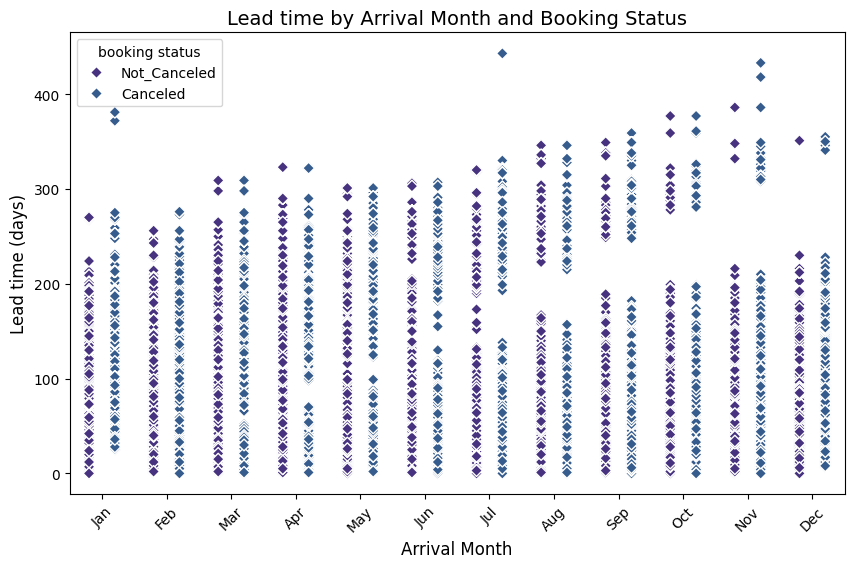

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'special requests' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=df, x=df['arrival_date'].dt.month, y='lead time', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Arrival Month and Booking Status', fontsize=14)
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Lead time (days)', fontsize=12)
plt.xticks(rotation=45)

# Reposition the legend to the bottom right
#plt.legend(title='Booking Status', loc='lower right', bbox_to_anchor=(1, 0))

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=range(12), labels=month_names)  # Use correct positions and labels

# Show the plot
plt.show()

### Relation beween Arrival Year, Booking status, and lead time

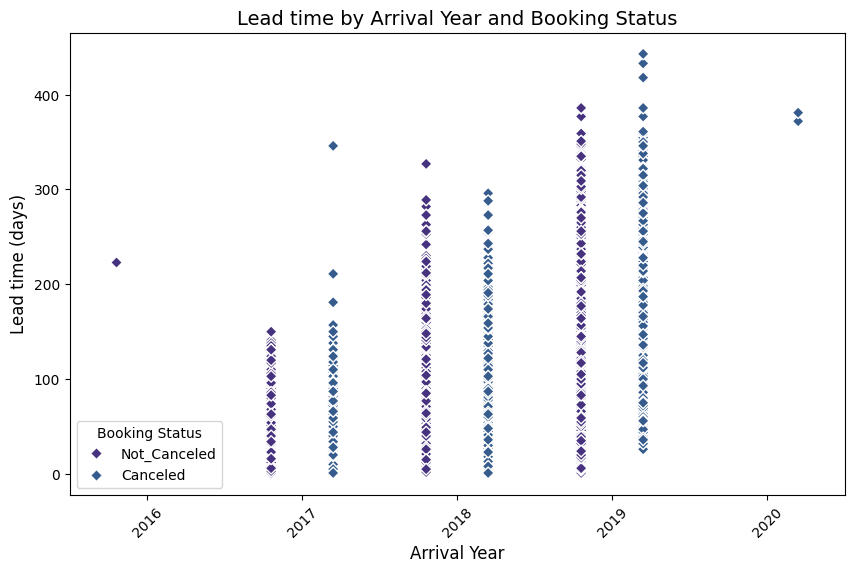

In [ ]:
# Set the 'viridis' color palette
sns.set_palette("viridis")

# Create a figure with the desired size
plt.figure(figsize=(10, 6))

# Create the strip plot with 'special requests' on the y-axis, 'lead time' on the x-axis
sns.stripplot(data=df, x=df['arrival_date'].dt.year, y='lead time', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=6, marker="D", linewidth=1)

# Add titles and labels
plt.title('Lead time by Arrival Year and Booking Status', fontsize=14)
plt.xlabel('Arrival Year', fontsize=12)
plt.ylabel('Lead time (days)', fontsize=12)
plt.xticks(rotation=45)

# Reposition the legend to the bottom right
plt.legend(title='Booking Status', loc='lower left', bbox_to_anchor=(0, 0))

# Show the plot
plt.show()

# Weekend Nights vs Total Nights

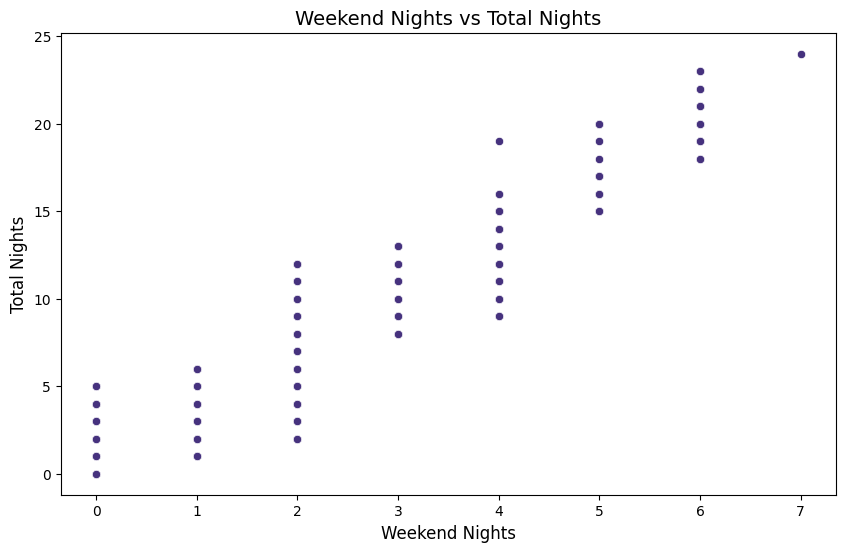

In [ ]:
# Scatter plot of weekend nights vs total nights
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_data, x='number of weekend nights', y='total_nights', palette='viridis')
plt.title('Weekend Nights vs Total Nights', fontsize=14)
plt.xlabel('Weekend Nights', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.show()

# Check for valid weekend nights

In [ ]:
# Create a copy of model_data
model_data_2 = model_data.copy()

# Define a function to mark valid/invalid bookings
def check_valid_booking(row):
    week_nights = row['number of week nights']
    weekend_nights = row['number of weekend nights']
    total_nights = row['total_nights']

    # Check if weekend nights are greater than weeknights but the total stay is too short
    if weekend_nights > 2 and total_nights <= 7:
        return 'Invalid'
    else:
        return 'Valid'

# Apply the function to create 'valid_booking' column
model_data_2['valid_booking'] = model_data_2.apply(check_valid_booking, axis=1)

# Filter invalid bookings
invalid_bookings = model_data_2[model_data_2['valid_booking'] == 'Invalid']

# Display invalid bookings
print("Invalid bookings (more weekend nights than weeknights and short total stay):")
invalid_bookings

Invalid bookings (more weekend nights than weeknights and short total stay):


Empty DataFrame
Columns: [number of adults, number of children, number of weekend nights, number of week nights, type of meal, car parking space, room type, lead time, market segment type, repeated, P-C, P-not-C, average price, special requests, date of reservation, booking status, arrival_date, total_individuals, total_nights, cancel_ratio_by_stay, customer_type, valid_booking]
Index: []

[0 rows x 22 columns]

### Weekend Nights vs Total Nights

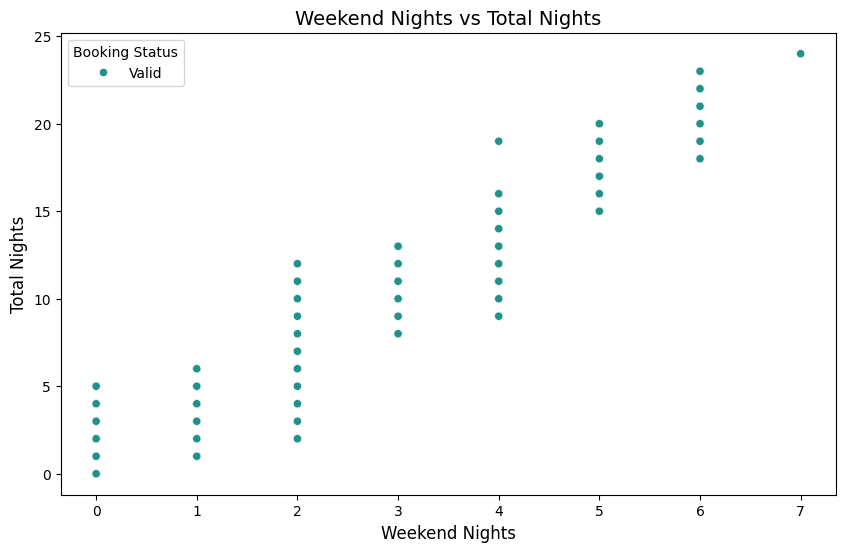

In [ ]:
# Scatter plot of weekend nights vs total nights, colored by valid/invalid bookings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_data_2, x='number of weekend nights', y='total_nights', hue='valid_booking', palette='viridis')
plt.title('Weekend Nights vs Total Nights', fontsize=14)
plt.xlabel('Weekend Nights', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.legend(title='Booking Status')

# Set x-ticks and y-ticks to show only even numbers, including 0
for ax in [ax1, ax2]:
    ax.set_xticks(range(0, int(model_data_2['number of weekend nights'].max()) + 1, 2))  # Even x-ticks
    ax.set_yticks(range(0, int(model_data_2['total_nights'].max()) + 1, 2))  # Even y-ticks

plt.show()

### Week Nights vs Total Nights

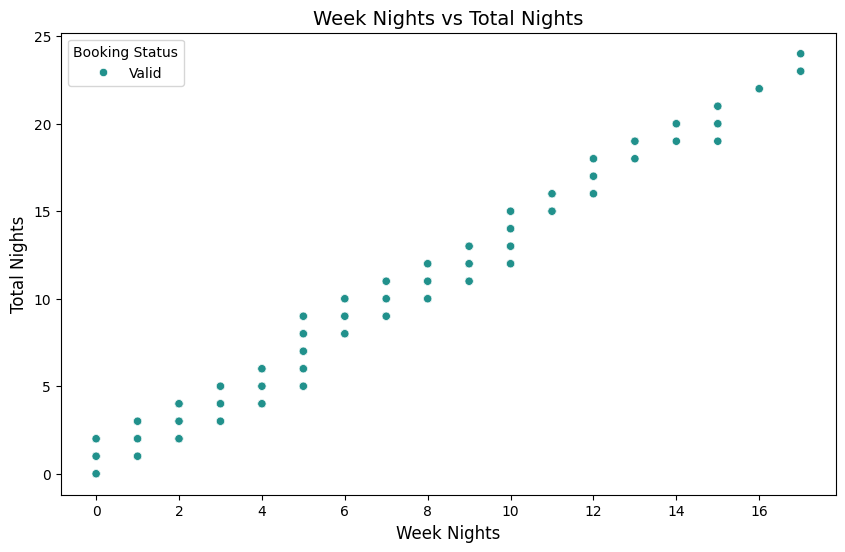

In [ ]:
# Scatter plot of week nights vs total nights, colored by valid/invalid bookings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_data_2, x='number of week nights', y='total_nights', hue='valid_booking', palette='viridis')
plt.title('Week Nights vs Total Nights', fontsize=14)
plt.xlabel('Week Nights', fontsize=12)
plt.ylabel('Total Nights', fontsize=12)
plt.legend(title='Booking Status')

# Set x-ticks and y-ticks to show only even numbers, including 0
plt.xticks(range(0, int(model_data_2['number of week nights'].max()) + 1, 2))  # Even x-ticks
# plt.yticks(range(0, int(model_data_2['total_nights'].max()) + 1, 5))  # Even y-ticks

plt.show()

### Adults Number vs Total Individuals Number

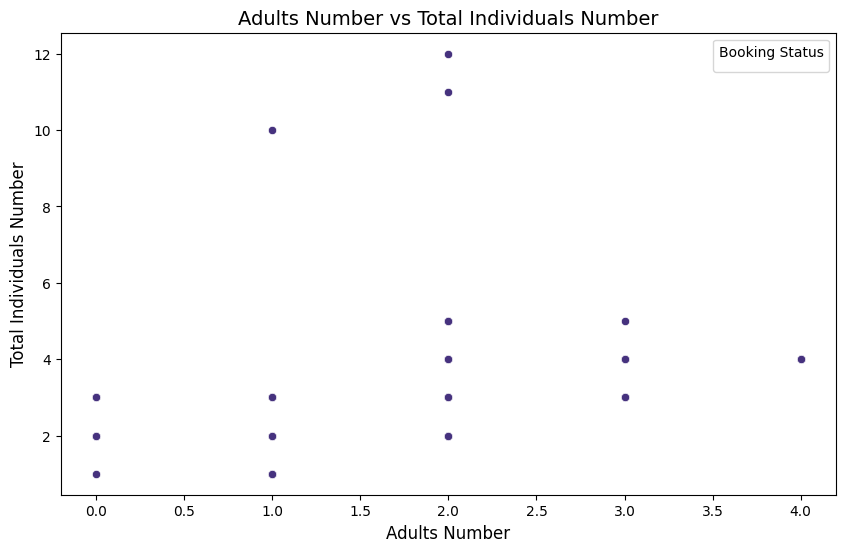

In [ ]:
# Scatter plot of Adults Number vs Total Individuals Number
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_data_2, x='number of adults', y='total_individuals', palette='viridis')
plt.title('Adults Number vs Total Individuals Number', fontsize=14)
plt.xlabel('Adults Number', fontsize=12)
plt.ylabel('Total Individuals Number', fontsize=12)
plt.legend(title='Booking Status')
plt.show()

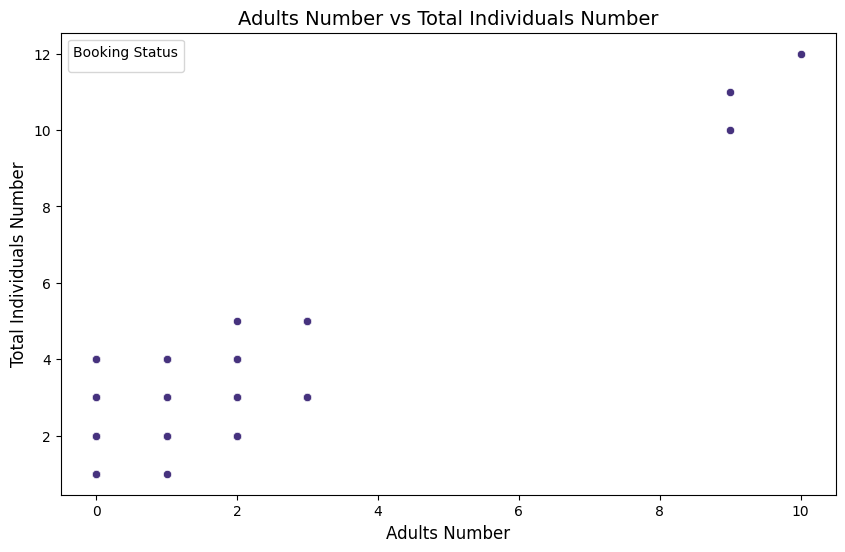

In [ ]:
# Scatter plot of Adults Number vs Total Individuals Number
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_data_2, x='number of children', y='total_individuals', palette='viridis')
plt.title('Adults Number vs Total Individuals Number', fontsize=14)
plt.xlabel('Adults Number', fontsize=12)
plt.ylabel('Total Individuals Number', fontsize=12)
plt.legend(title='Booking Status')
plt.show()

# Relation between all feature, Booking status, price and lead time

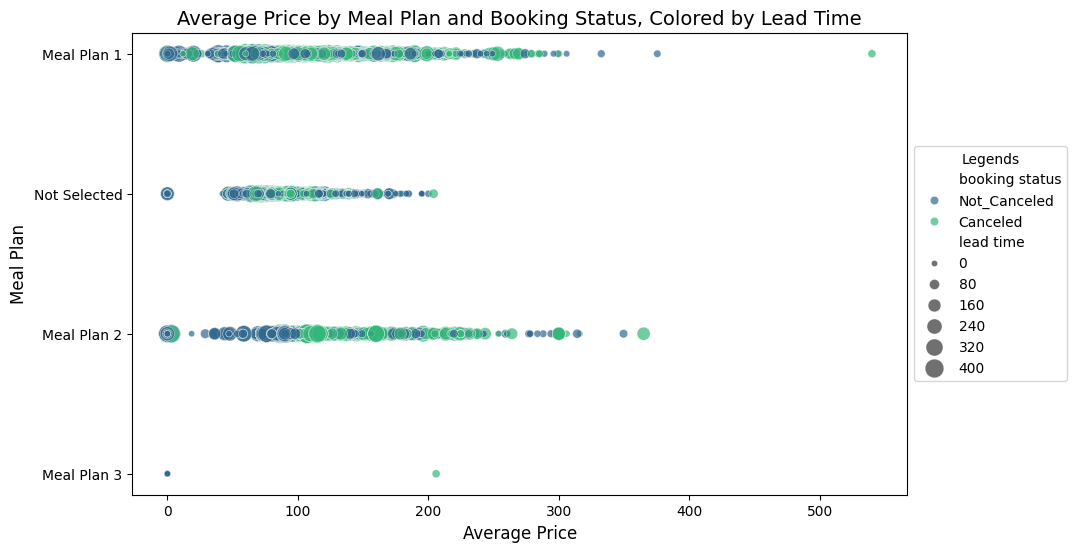

In [ ]:
# Create the scatter plot with 'type of meal' on the y-axis, 'average price' on the x-axis, and lead time as color
plt.figure(figsize=(10, 6))

# Scatter plot with hue for booking status and color based on lead time
sns.scatterplot(data=df, x='average price', y='type of meal', hue='booking status',
                size='lead time', sizes=(20, 200),  # Adjust the sizes to represent the 'lead time'
                palette="viridis", edgecolor="white", alpha=0.7)

# Add titles and labels
plt.title('Average Price by Meal Plan and Booking Status, Colored by Lead Time', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Meal Plan', fontsize=12)

# Reposition the legend to the right
plt.legend(title='Legends', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


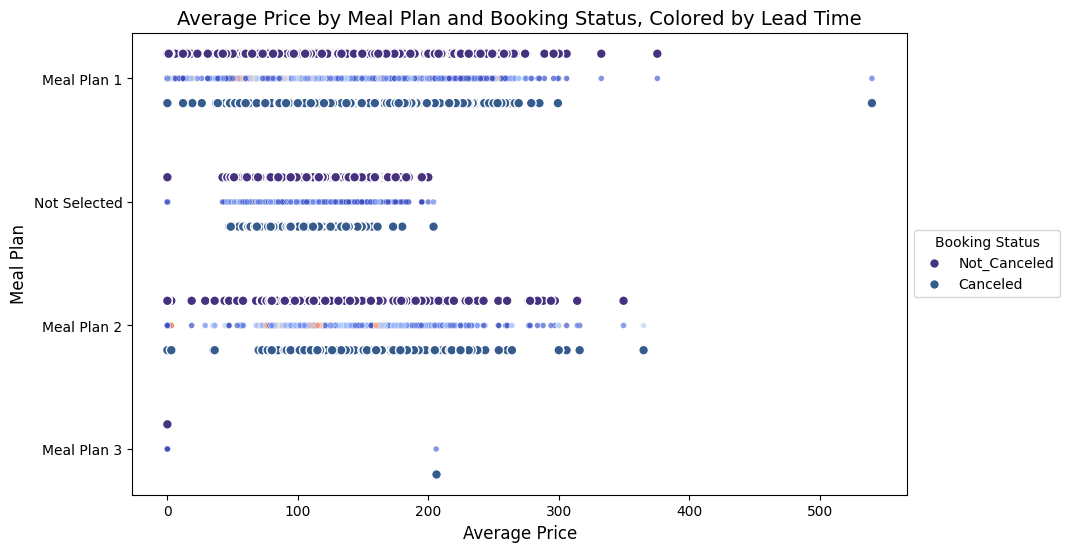

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create the strip plot with dodging between canceled and not canceled, and color by lead time
sns.stripplot(data=df,
              x='average price', y='type of meal', hue='booking status',
              dodge=True, jitter=False, edgecolor="white", size=7, linewidth=1)

# Overlay the points with a color map based on lead time (without dodging this time)
sns.scatterplot(data=df, x='average price', y='type of meal', hue='lead time',
                palette='coolwarm', size=5, alpha=0.7, legend=False)

# Add titles and labels
plt.title('Average Price by Meal Plan and Booking Status, Colored by Lead Time', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Meal Plan', fontsize=12)

# Adjust the legend positioning for booking status
plt.legend(title='Booking Status', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()
